# Telecom Churn - ML Group Case Study

## *Business Problem Overview* ¶
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## *Business objective*¶
The business objective is to predict the churn in the last (i.e. the ninth) month using the features/data from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
### *Understanding Customer Behaviour During Churn*¶
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## *About dataset:*
Dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

# Importing Libraries

In [1]:
# hide warnings
import warnings
warnings.filterwarnings("ignore")
# Import Libraries
import sys,joblib
import six
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_context("talk", font_scale = 0.65, rc={"grid.linewidth": 5})
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 400)
from sklearn.linear_model import LogisticRegression,LinearRegression,LassoCV,Lasso,Ridge,LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer
from scipy.stats import skew
from fancyimpute import IterativeImputer,KNN
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm


In [2]:
telecom = pd.read_csv('../input/telecom-churn-dataset/telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#Checking the shape
print(telecom.shape)
print('\n')
# Checking Dataset Info 
print(telecom.info(verbose=True,null_counts=True))

(99999, 226)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  flo

In [4]:
#Summary and checking outliers
telecom.describe(percentiles=[0.25,0.5,0.75,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
#Function to check percentage of null values present in dataset 
def calnullpercentage(df):
    missing_num= df[df.columns].isna().sum().sort_values(ascending=False)
    missing_perc= (df[df.columns].isna().sum()/len(df)*100).sort_values(ascending=False)
    missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
    missing= missing[missing['Percentage']>0]
    return missing

In [6]:
# check the %age of null values
calnullpercentage(telecom)


,Total,Percentage
count_rech_2g_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_6,74846,74.846748


In [7]:
# Number of columns having null values
print(len(calnullpercentage(telecom)))

166


`Out of 226 columns 166 have null values`

In [8]:
#Checking categorical and numerical columns 
telecom.select_dtypes(include='object').head(3)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014


## Filter high-value customers
We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [9]:
# Deriving new columns for total recharge amount data for 6 and 7th month
telecom['tot_rech_amt_data_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['tot_rech_amt_data_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
# Deriving new columns for total amount spent during  6 and 7th month
telecom['tot_amt_6'] = telecom[['total_rech_amt_6','tot_rech_amt_data_6']].sum(axis=1)
telecom['tot_amt_7'] = telecom[['total_rech_amt_7','tot_rech_amt_data_7']].sum(axis=1)
#first two months average
telecom['avg_amt_6_7'] = telecom[['tot_amt_6','tot_amt_7']].mean(axis=1)
# Filtering customers based on percentile having goodphase_avg more than or equal to cutoff of 70th percentile
telecom=telecom.loc[(telecom['avg_amt_6_7'] >= np.percentile(telecom['avg_amt_6_7'], 70))]
telecom.shape

(30001, 231)

` I have taken  recharge amount `more than or equal to X`, where X is the 70th percentile of the average recharge amount in the first two months and getting 30k rows. If I use `more than(>)sign`, will get 29.9k rows, but going with problem statement.`

In [10]:
# Deriving new columns for total recharge amount data for 8 and 9th month
telecom['tot_rech_amt_data_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['tot_rech_amt_data_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']
# Deriving new columns for total amount spent during  8 and 9th month
telecom['tot_amt_8'] = telecom[['total_rech_amt_8','tot_rech_amt_data_8']].sum(axis=1)
telecom['tot_amt_9'] = telecom[['total_rech_amt_9','tot_rech_amt_data_9']].sum(axis=1)

In [11]:
#Finding categorical columns where dtype is float but those columns are having 0 or 1 values only
catg= []
for col in telecom.columns:
    if len(telecom[col].unique())== 2 | 3:
        catg.append(col)
# COnverting into categorical or object type
telecom[catg]=telecom[catg].apply(lambda x:x.astype('object'))
col_tmp=['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_num_9','total_rech_data_6',\
        'total_rech_data_7','total_rech_data_8','total_rech_data_9']
telecom[col_tmp]=telecom[col_tmp].apply(lambda x:x.astype('object'))

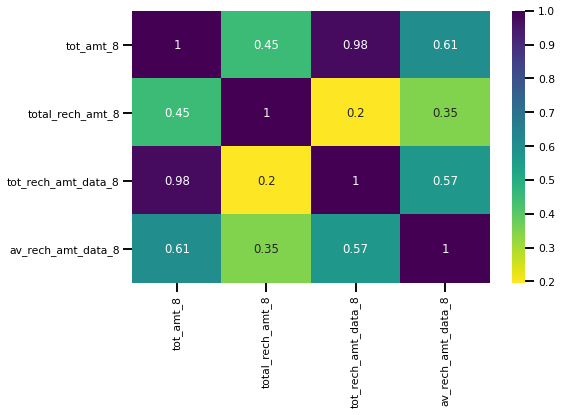

In [12]:
x=['tot_amt_8','total_rech_amt_8','tot_rech_amt_data_8','total_rech_data_8','av_rech_amt_data_8']
plt.figure(figsize=(8,5))
sns.heatmap(telecom[x].corr(),annot=True,cmap='viridis_r')

#### Dropping Redundant columns, since we have already created derived features from them and derived features reflects the same information.

In [13]:
telecom.drop(['tot_rech_amt_data_6','tot_rech_amt_data_7','tot_rech_amt_data_8',\
              'tot_rech_amt_data_9'],inplace=True,axis=1)


## Identifying CHURN CUSTOMERS 

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [14]:
# Where summation of columns = 0 then churn =1  else 0
telecom['churn']= np.where(telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9',\
                                    'vol_3g_mb_9']].sum(axis=1)== 0,1,0)

In [15]:
# Removing all features having ‘ _9’, etc. in their names
telecom.drop(telecom.filter(regex='_9|sep', axis = 1).columns, axis=1,inplace=True)

In [16]:
## Churn Percentage
pd.DataFrame(round(telecom['churn'].value_counts(normalize=True)*100,2))

,churn
0,91.86
1,8.14


` approximately 92% customers not churned and 8% customers got churned. Also, we can see class imbalance is there and we will deal with it later` 

<b>`For each feature, it counts the values of that feature. If the most recurrent value of the feature is repeated almost in all the instances (*zeros / len(X) * 100 > 95*). Then it drops these features because their values are almost the same for all instances and will not help in learning process and those features are not useful in our prediction.`

In [17]:
telecom.shape

(30001, 176)

In [18]:
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 95:
            redundant.append(i)
    redundant = list(redundant)
    return redundant



In [19]:
print('Before dropping Redundant features: ',telecom.shape)
redundant_features = redundant_feature(telecom)
telecom = telecom.drop(redundant_features, axis=1)
print('After dropping Redundant features: ',telecom.shape)

Before dropping Redundant features:  (30001, 176)
After dropping Redundant features:  (30001, 161)


`Function to impute NaN values where %age of missing values > 40%, Reason for taking cutoff 40% is beacuse for these columns we can replace NaN with 0(for example, fb_user_7, not used facebook(NaN),av_rech_amt_data_8, not done recharge(NaN) similarly for other columns.`

In [20]:
#Function to impute NaN with 0
def imputeNaN(df,col_name):
    for col in col_name:
        df[col].fillna(0,inplace=True)
col_40= calnullpercentage(telecom)[calnullpercentage(telecom)['Percentage']>40].index
#call function
imputeNaN(telecom,col_40)

In [21]:
# checking %age of null values
calnullpercentage(telecom)

,Total,Percentage
std_ic_t2f_mou_8,1174,3.913203
ic_others_8,1174,3.913203
loc_og_t2c_mou_8,1174,3.913203
loc_og_mou_8,1174,3.913203
loc_ic_t2m_mou_8,1174,3.913203
loc_og_t2f_mou_8,1174,3.913203
loc_og_t2m_mou_8,1174,3.913203
loc_ic_t2f_mou_8,1174,3.913203
std_og_t2f_mou_8,1174,3.913203
loc_og_t2t_mou_8,1174,3.913203


` As we can see from above missing value dataframe and value count == 0, large percentage of values are zero in missing value columns. I can impute most missing value column having NaN value with 0 if I assume that they have not use local incoming service, special outgoing service that is why these columns have NaN values. But this assumption doesn't helping much beacuse most values in these columns have 0 and it infers the same thing. So Imputing missing values for columns mentioned above.`

In [22]:
pd.DataFrame((telecom[calnullpercentage(telecom).index]==0).sum()).head(10)

,0
std_ic_t2f_mou_8,21248
ic_others_8,21405
loc_og_t2c_mou_8,21262
loc_og_mou_8,2379
loc_ic_t2m_mou_8,1364
loc_og_t2f_mou_8,14422
loc_og_t2m_mou_8,2576
loc_ic_t2f_mou_8,9189
std_og_t2f_mou_8,24613
loc_og_t2t_mou_8,3887


In [23]:
imput_col= list(set(calnullpercentage(telecom).index)-set(('date_of_last_rech_6',\
                                                      'date_of_last_rech_7','date_of_last_rech_8')))
knn_imp =KNNImputer()
telecom[imput_col] = knn_imp.fit_transform(telecom[imput_col])

In [24]:
# checking %age of null values
calnullpercentage(telecom)

,Total,Percentage
date_of_last_rech_8,583,1.943269
date_of_last_rech_7,98,0.326656
date_of_last_rech_6,73,0.243325


`Lets fill these data missing values with 0 since date is not available for these columns. We will handle these rows later in an efficient way`

In [25]:
telecom.fillna(0,inplace=True)

In [26]:
# checking %age of null values
calnullpercentage(telecom)

,Total,Percentage


In [27]:
telecom.shape

(30001, 161)

`After dropping missing values will result in dropping 1838 or 6% rows`

In [28]:
# Checking missing value percentage if any
calnullpercentage(telecom) #no missing value

,Total,Percentage


In [29]:
telecom.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_amt_6,tot_amt_7,avg_amt_6_7,tot_amt_8,churn
0,7000842753,197.385,214.816,213.803,0.402,0.00,0.00,2.176,2.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.402,0.00,0.00,1.098,0.106,0.00,0.00,0.07,0.00,1.078,0.566,0.00,1.50,0.176,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.12,2.752,0.00,0.248,0.00,0.00,0.00,2.764,1.53,0.16,2.986,6.252,4.13,1.452,0.386,1.15,7.204,8.17,5.44,0.632,0.00,0.00,6.856,2.85,0.00,0.00,0.00,0.00,7.488,2.85,0.00,0.00,0.00,5.44,0.026,0.04,0.0,0.062,0.00,0.00,0.472,0.036,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,614.0,504.0,559.0,504.0,1
7,7000701601,1069.180,1349.850,3171.480,57.840,54.68,52.29,453.430,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.390,31.38,40.28,308.630,447.380,162.28,62.13,55.14,53.23,0.000,0.000,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.000,6.50,0.000,487.53,609.24,350.16,58.140,32.26,27.31,217.560,221.490,121.19,152.160,101.460,39.53,427.880,355.23,188.04,36.890,11.83,30.39,91.440,126.99,141.33,52.19,34.24,22.21,180.540,173.08,193.94,626.46,558.04,428.74,0.210,0.00,0.0,2.060,14.53,31.59,15.740,15.190,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0

In [30]:
# no duplicate mobile number
len(telecom['mobile_number'].unique())

30001

In [31]:
#Dropping mobile number since it doesn't help in modelling and prediction 
telecom.drop('mobile_number',inplace=True,axis=1)

# Data Visualisation and EDA

#### Function to show values on bar plot

In [32]:
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9) 

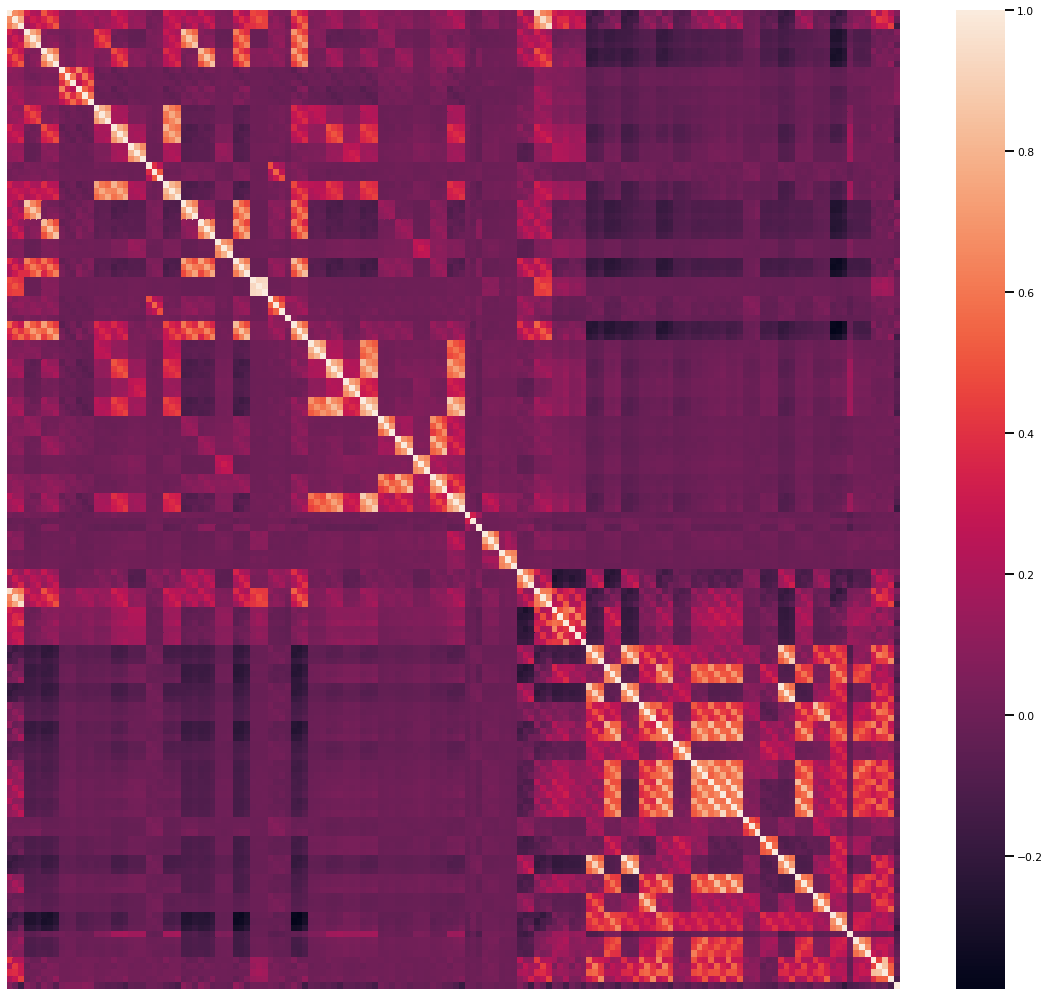

In [33]:
#### Correlation between numerical variables
plt.figure(figsize=(20,18))
ax=sns.heatmap(telecom.corr())
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

`As we can see from the graph, correlation is present between features. We will take care of correlated features later using techniques like PCA, t-SNE or any  other suitable technique for this problem`

In [34]:
# Function to plot distribution plot for months(6,7 and 8) for churn and non churn customers. 
# Also, plotting box plot and strip plot for the same.
def dist_box_plot(df,col1,col2,col3):    
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][col1], bins = 40, ax = axes[0], kde = False,\
                      color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col1], bins = 40, ax = axes[1], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==1][col2], bins = 40, ax = axes[2], kde = False,\
                     color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col2], bins = 40, ax = axes[3], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
    ax=sns.boxplot(x='churn', y=col1, data=df,ax=axes[0])
    ax=sns.stripplot(x='churn', y=col1, data=df, jitter=True, edgecolor="gray",ax=axes[0])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col1,fontweight='bold',size=20)
    ax=sns.boxplot(x='churn', y=col2, data=df,ax=axes[1])
    ax=sns.stripplot(x='churn', y=col2, data=df, jitter=True, edgecolor="gray",ax=axes[1])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col2,fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][col3], bins = 40, ax = axes[0], kde = False,\
                     color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col3],bins=40, ax = axes[1], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax=sns.boxplot(x='churn', y=col3, data=df,ax=axes[2])
    ax=sns.stripplot(x='churn', y=col3, data=df, jitter=True, edgecolor="gray",ax=axes[2])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col3,fontweight='bold',size=20)
    plt.show()

## arpu (Average Revenue per user)

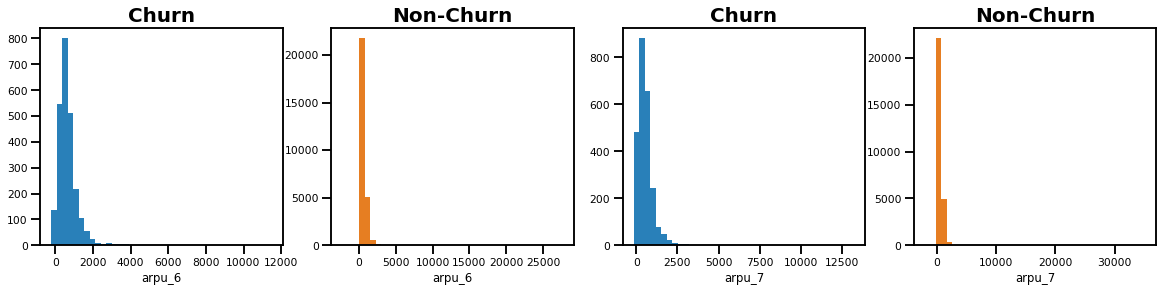

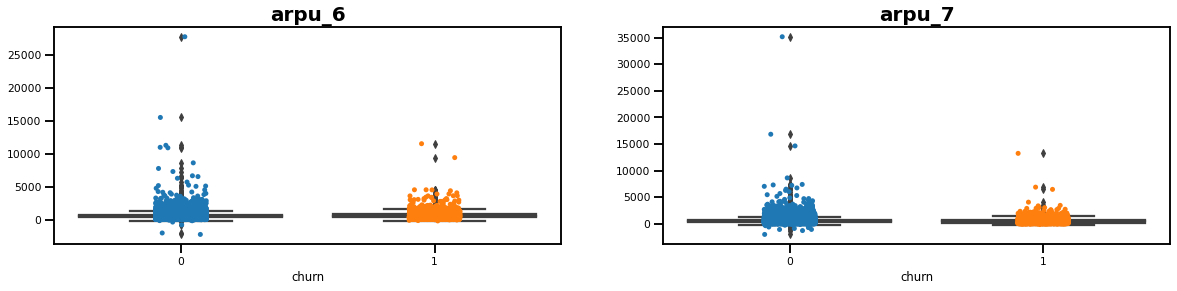

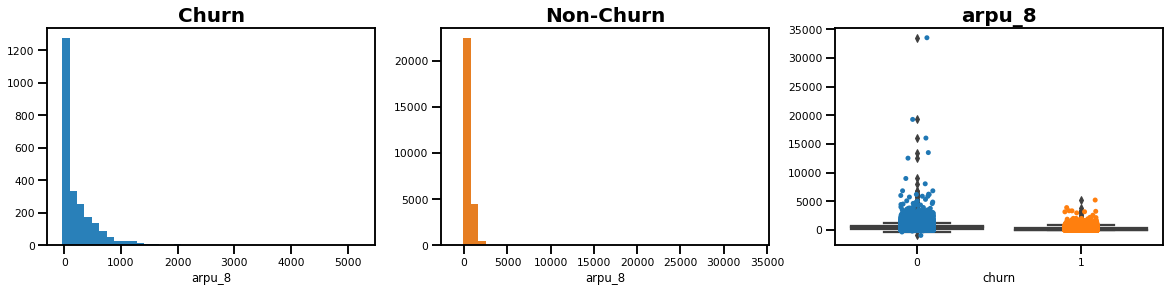

In [35]:
dist_box_plot(telecom,'arpu_6','arpu_7','arpu_8')

` As we can see average revenue per user is decreasing for churn customers in 8th month.Also there are lots of outlier exists in revenue as some customers might using higher data and recharging frequently.`

### onnnet_mou (Minutes of usage for all kind of calls within the same operator network)

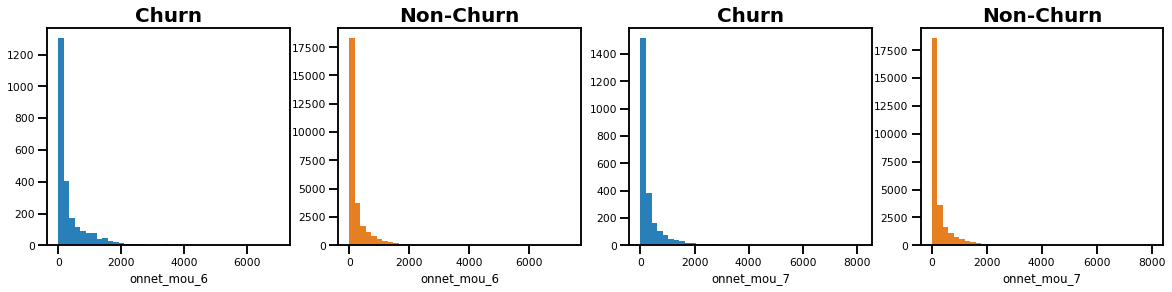

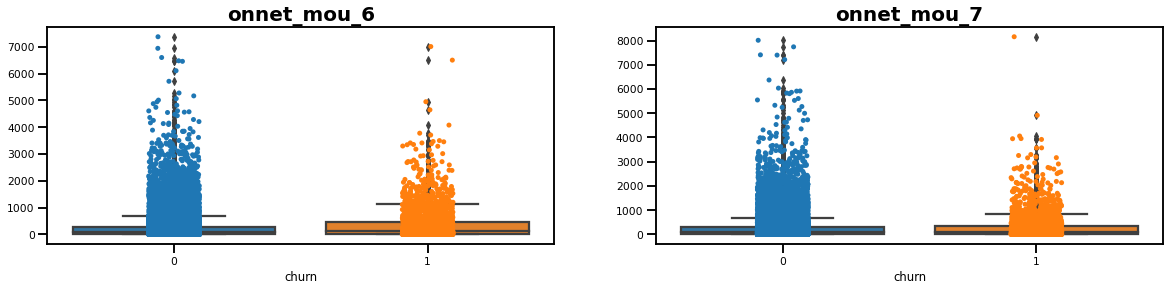

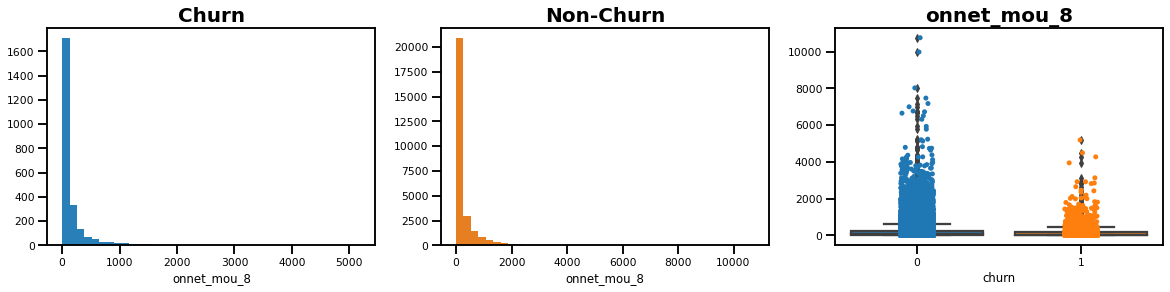

In [36]:
dist_box_plot(telecom,'onnet_mou_6','onnet_mou_7','onnet_mou_8')

`we can clearly see that Minutes of usage for all kind of calls within the same operator network is decreasing for churn customers.Also it looks like some of the customers are having high minutes of usage( outlier present)`

# offnet_mou (Minutes of usage for All kind of calls outside the operator T network)

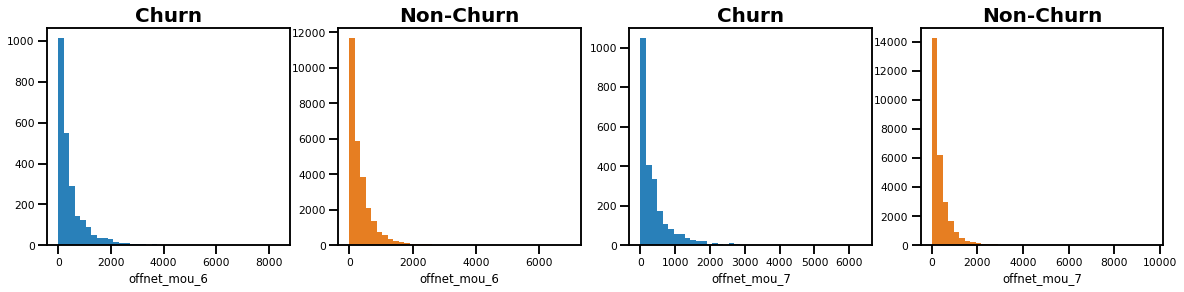

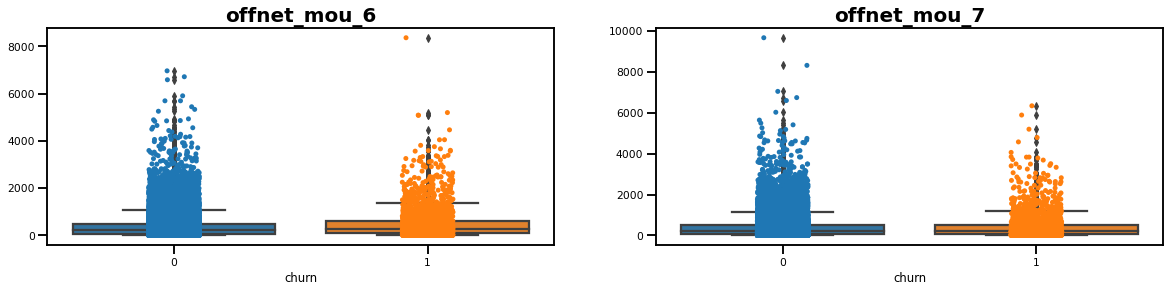

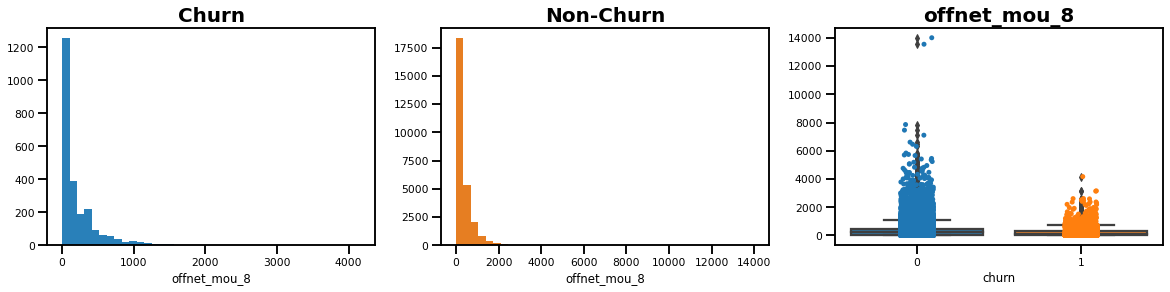

In [37]:
dist_box_plot(telecom,'offnet_mou_6','offnet_mou_7','offnet_mou_8')

`Similalry Offnet minutes of usage is also decreasing for churn customers in 8th month.As compared to 6th and 7th month , in 8th month there is no high minutes of usage as the gitter graph is condensed.`

### roam_ic_mou (Minutes of usage on roaming incoming calls)

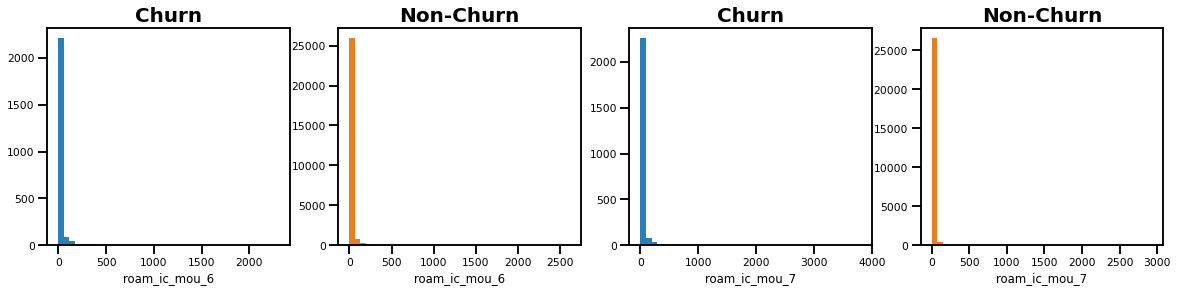

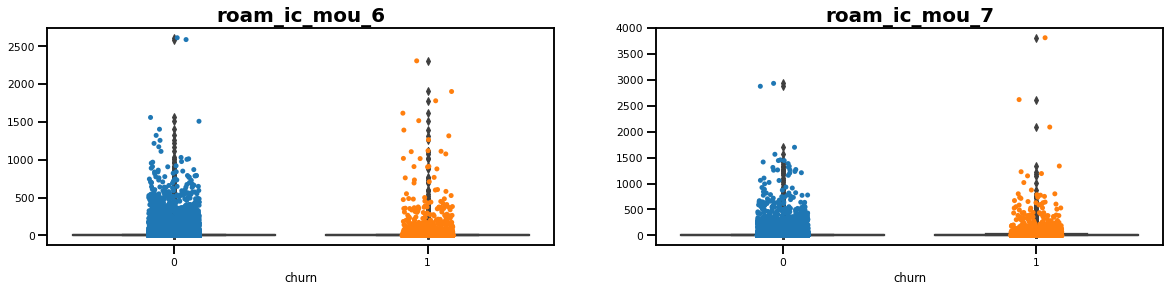

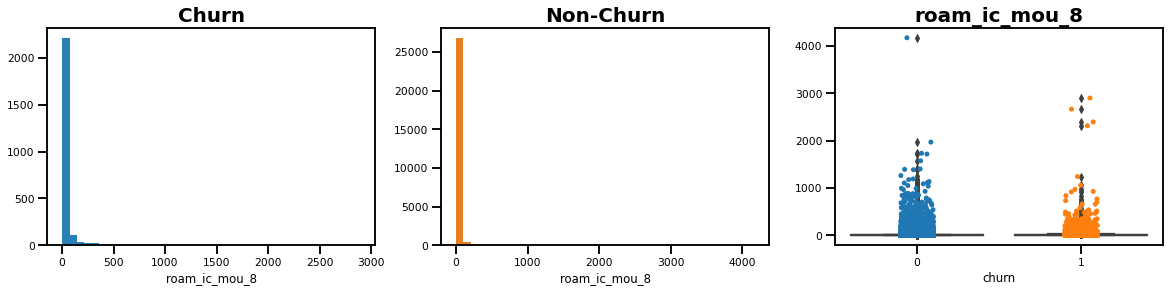

In [38]:
dist_box_plot(telecom,'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8')

`As compard to other parameters it looks like customers uses less services during roaming. Also gitter graph for 8th month (churn customers) shows slight decrease in mou.`

### loc_og_t2t_mou (Minutes of usage within same operator on local outgoing calls)

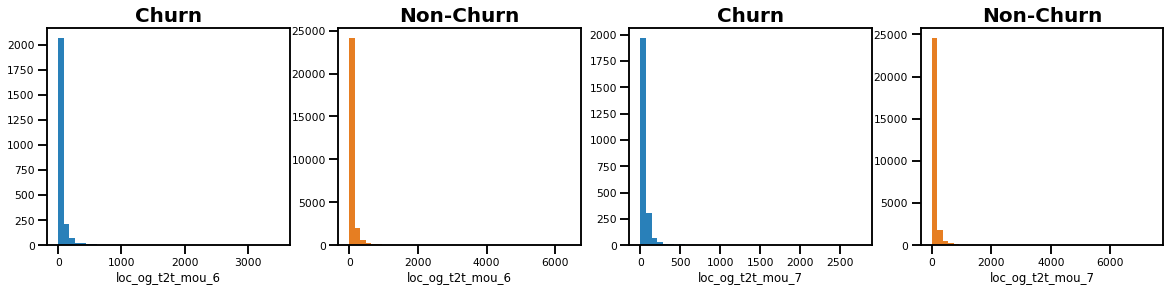

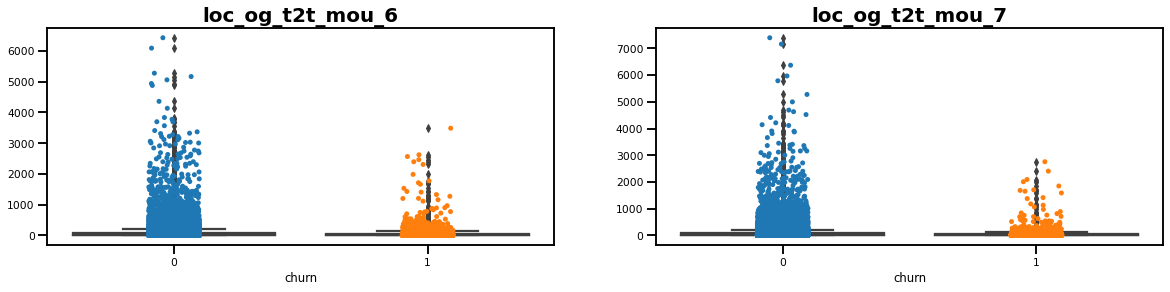

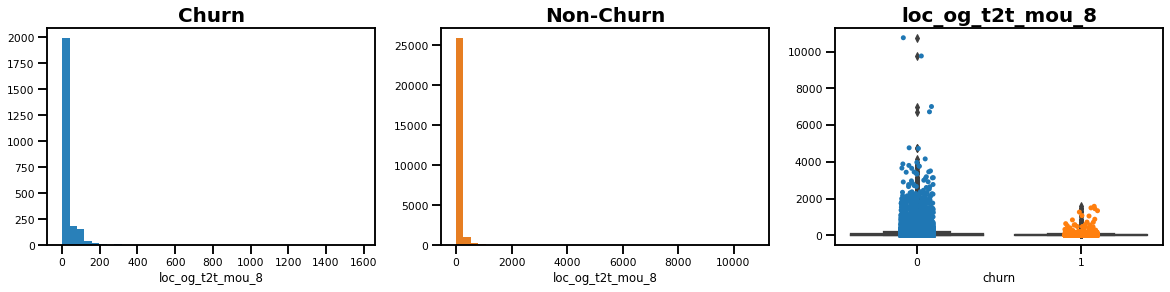

In [39]:
dist_box_plot(telecom,'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8')

`local outgoing call with in same operator has decreased in 8th month for churn customers.`

### loc_og_t2m_mou  (Minutes of usage from operator T to fixed line T on local outgoing calls)

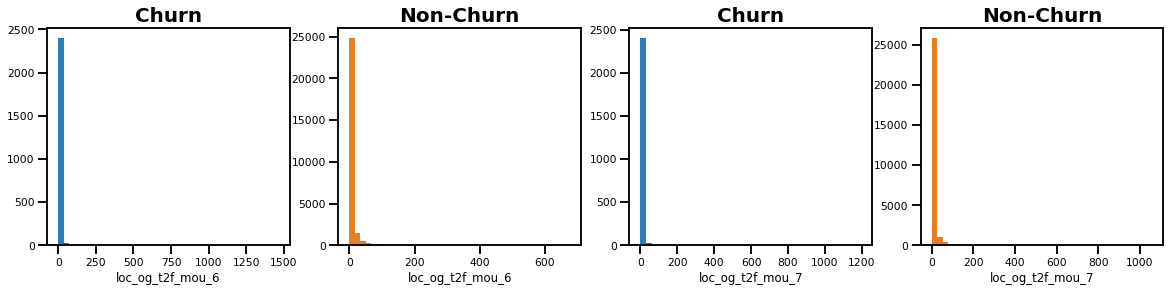

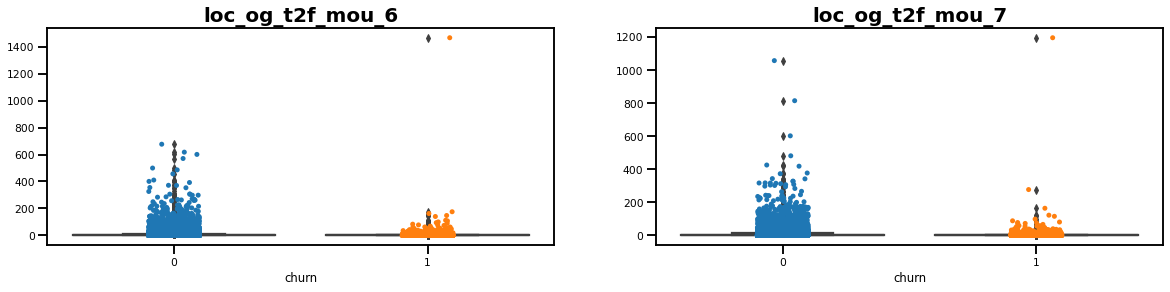

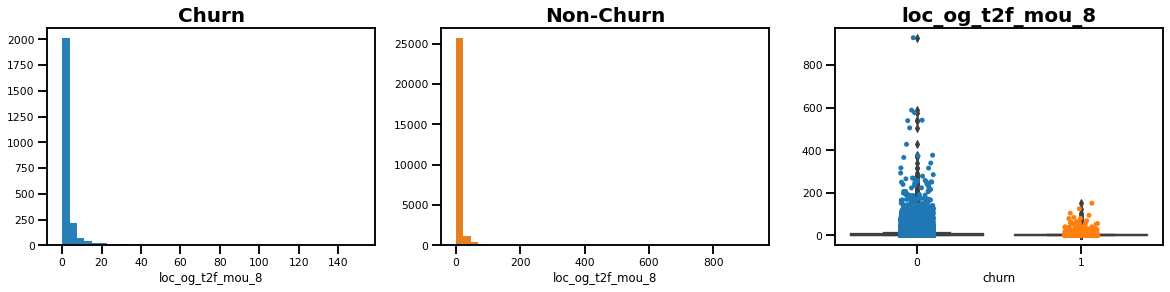

In [40]:
dist_box_plot(telecom,'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8')

`As we can see clearly very less usage of Minutes of usage from operator T to fixed line T on local outgoing calls, which means customers prefer calling mobile.Also there is no outliers present for 8th month churn customer graph which shows decrease in minutes of usage.`

### std_og_t2t_mou  (Minutes of usage within same operator on STD outgoing calls)

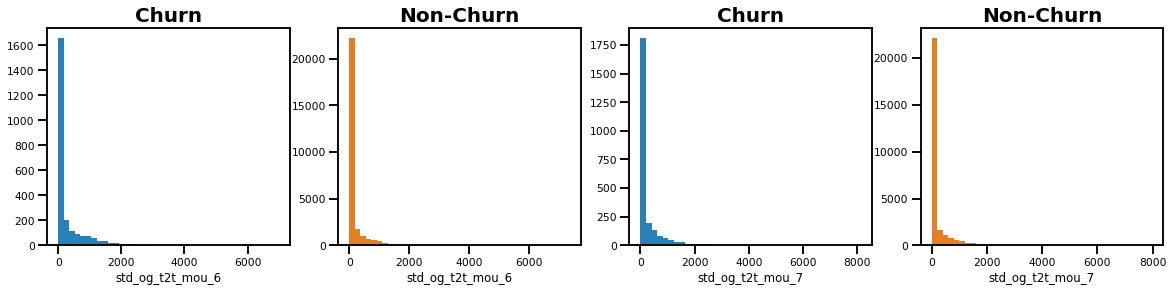

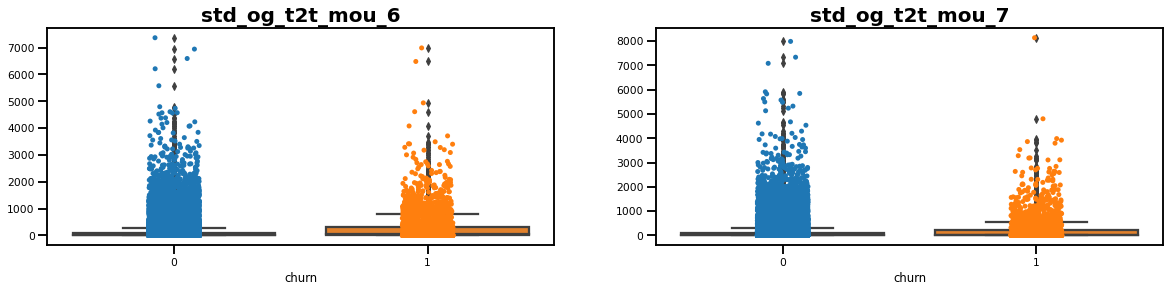

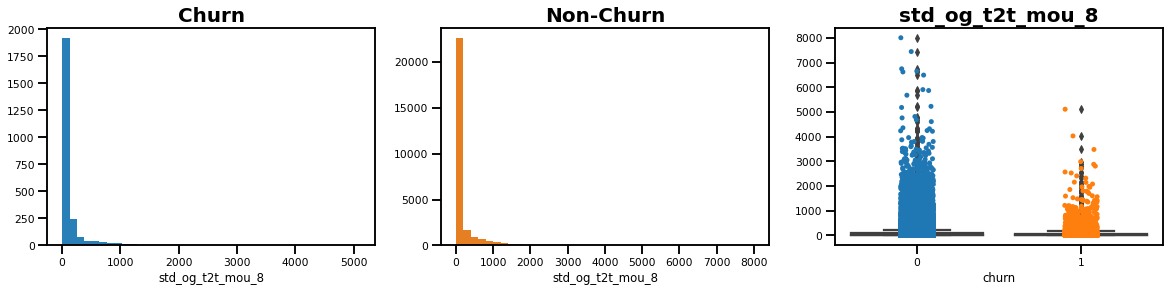

In [41]:
dist_box_plot(telecom,'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8')

` Significant decrease in minutes of usage within same operator on STD outgoing calls for the churn customers in 8th month .`

### isd_og_mou  (Minutes of usage  on ISD outgoing calls)

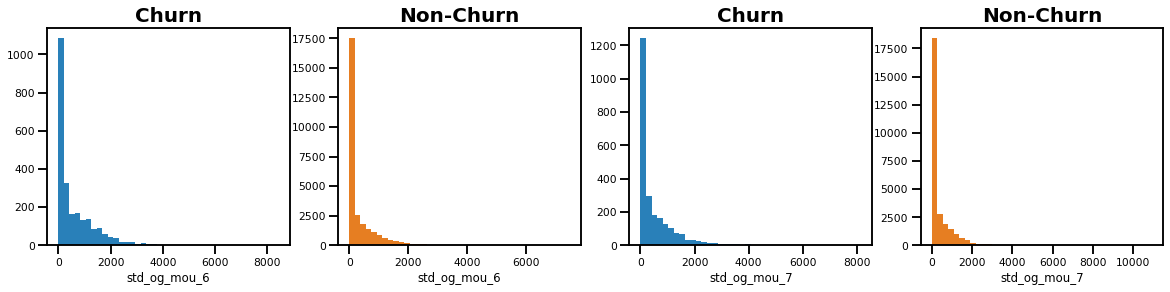

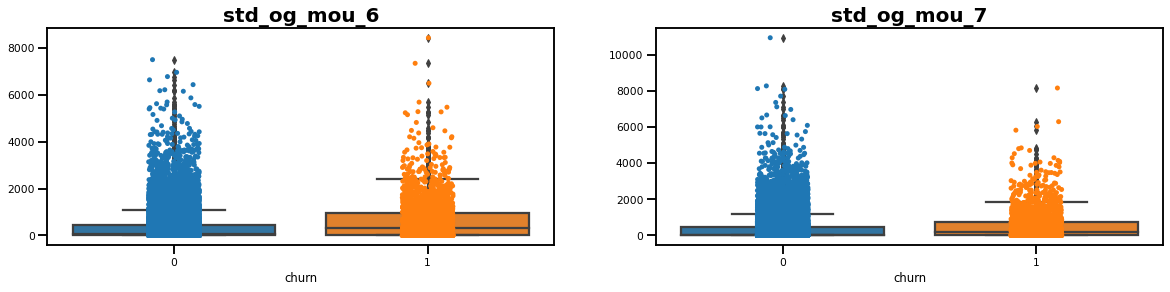

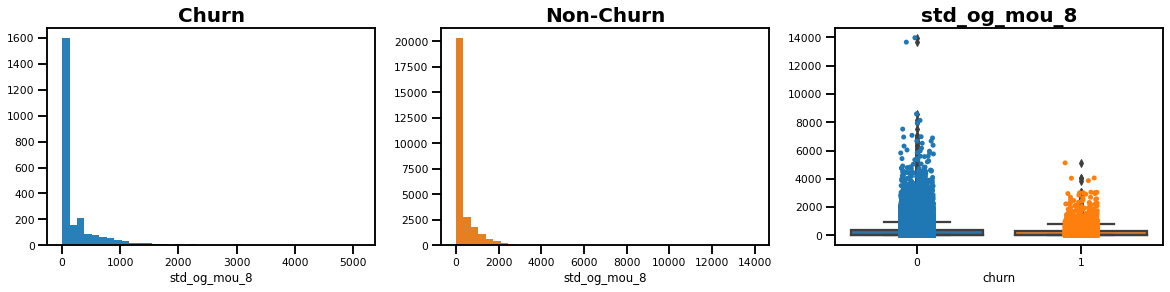

In [42]:
dist_box_plot(telecom,'std_og_mou_6','std_og_mou_7','std_og_mou_8')

`STD outgoing calls has been decreased for 8th month churn customers.`

### spl_og_mou  (Minutes of usage  on Special calls)

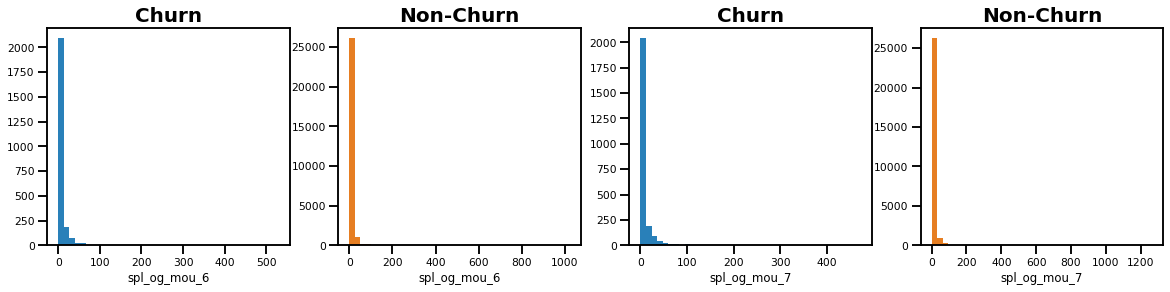

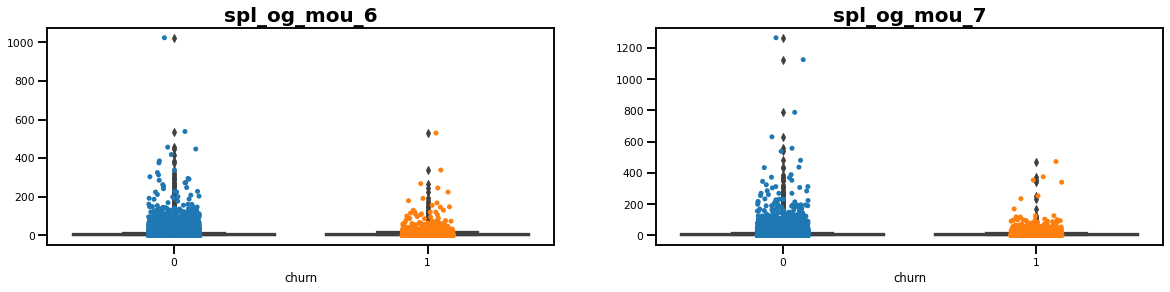

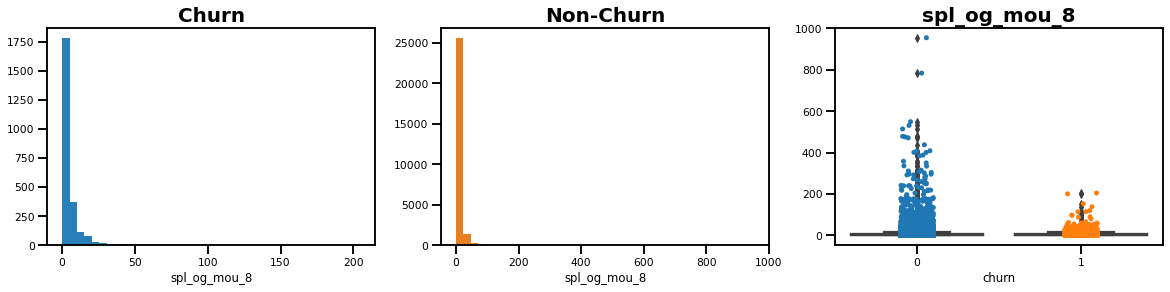

In [43]:
dist_box_plot(telecom,'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8')

` Less Minutes of usage on Special calls for churn customers in 8th month. There are some customers who are having high minutes of usage.`

### loc_ic_t2t_mou  (Minutes of usage within same operator on local incoming calls)

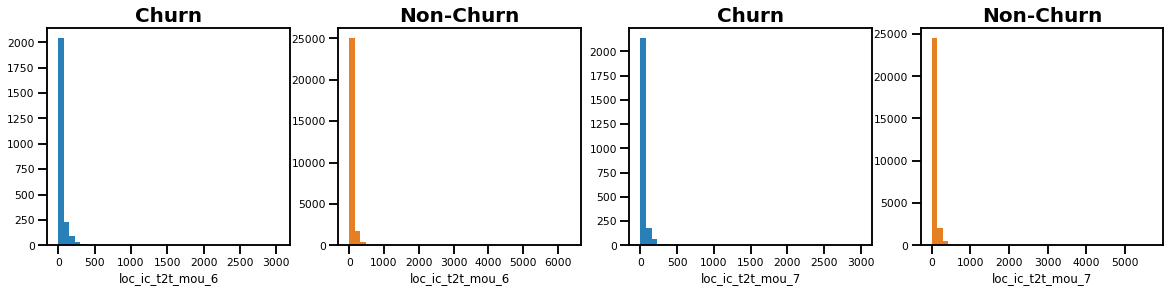

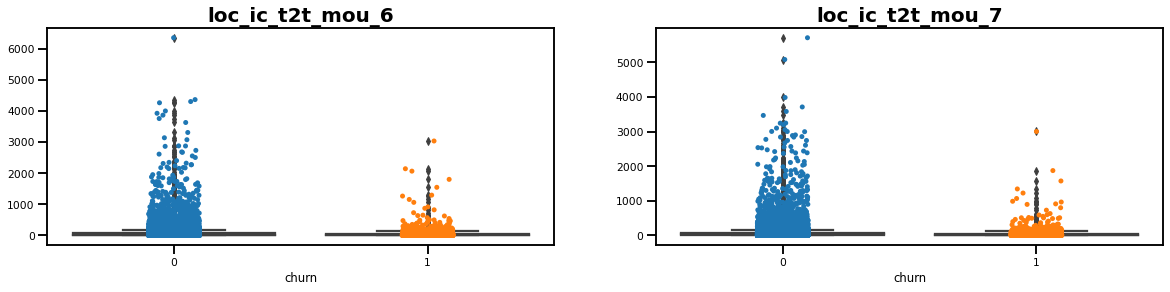

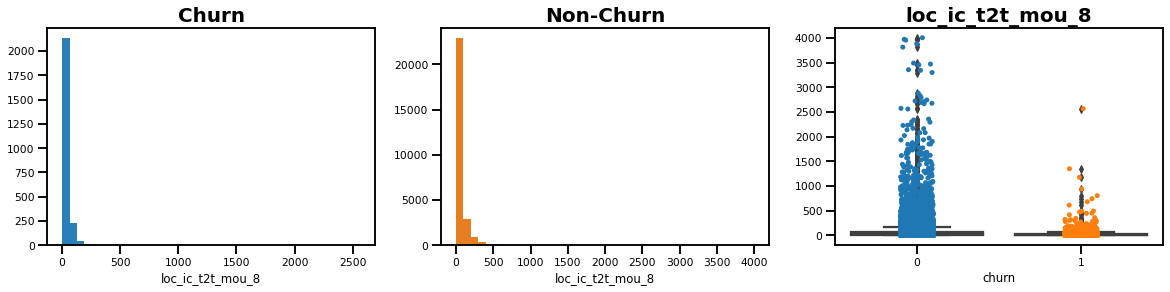

In [44]:
dist_box_plot(telecom,'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8')

`Local Incoming calls minutes of usage are reduced in 8th month. Huge outliers for Non churn customers`

### loc_ic_t2f_mou  (Minutes of usage from Operator T to fixed lines of T on local incoming calls)

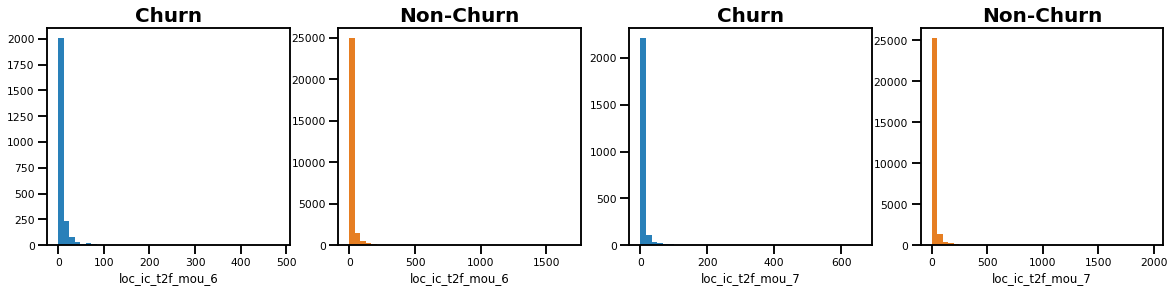

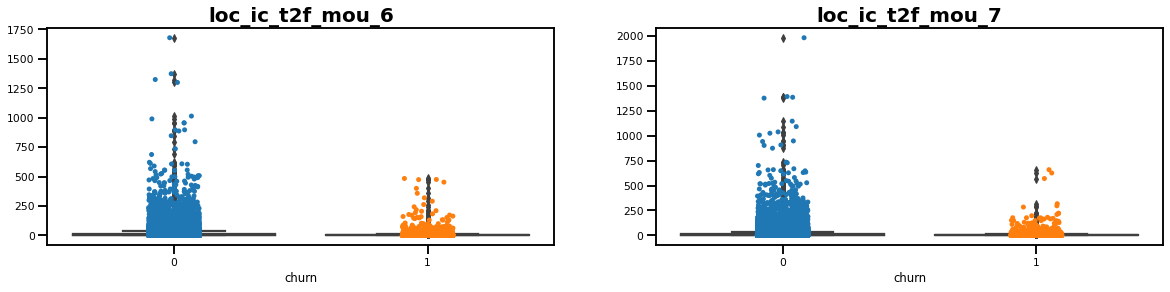

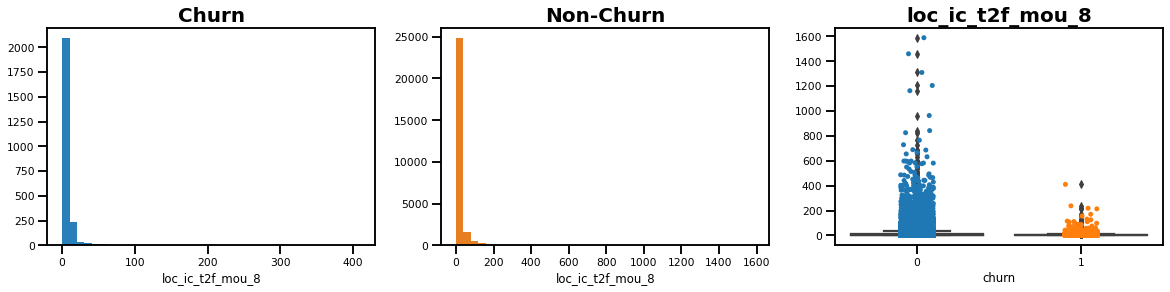

In [45]:
dist_box_plot(telecom,'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8')

`Only few customer are calling to Fixed line. Also mou for fixed lines is decreased for churn customers in 8th month.`

### total_ic_mou  (Total Minutes of usage on incoming calls)

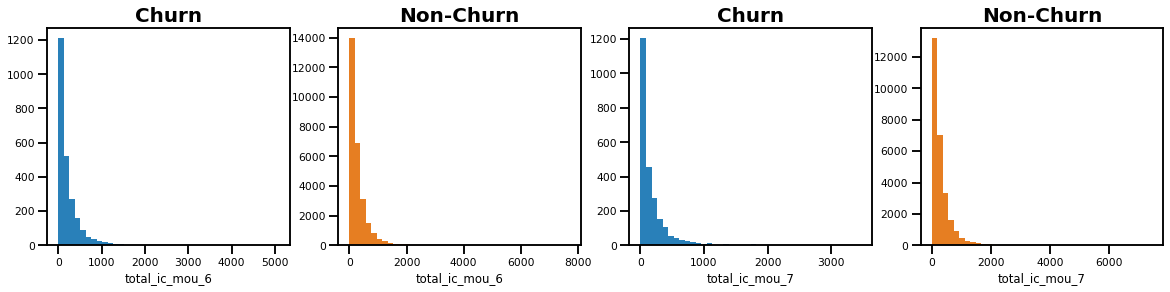

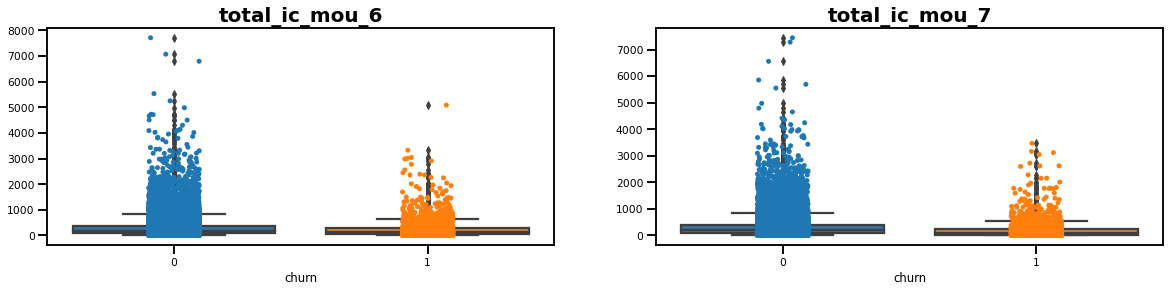

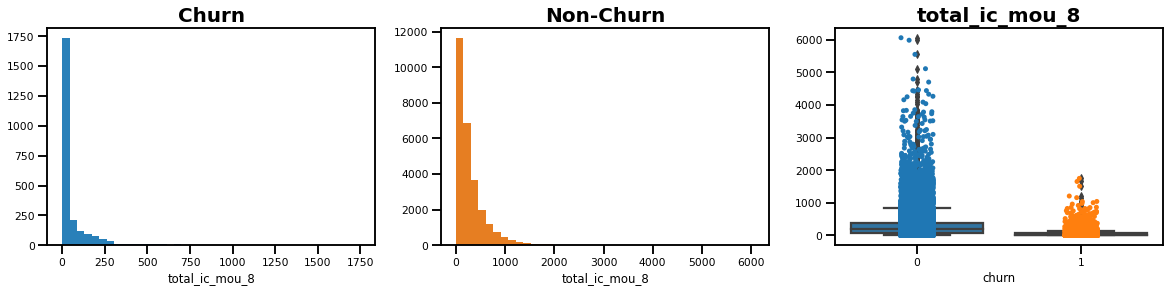

In [46]:
dist_box_plot(telecom,'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8')

`Significant drop in Total Minutes of usage on incoming calls for 8th month for churn customers. High outliers  present for  non churn customers.`

### total_rech_amt (Total Reacharge Amount)

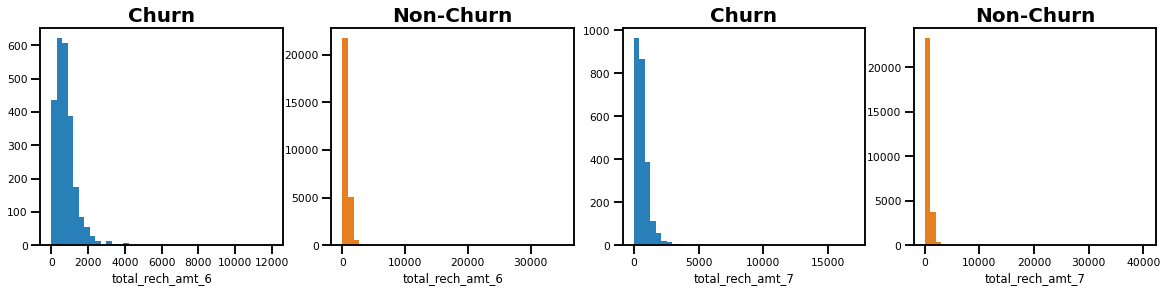

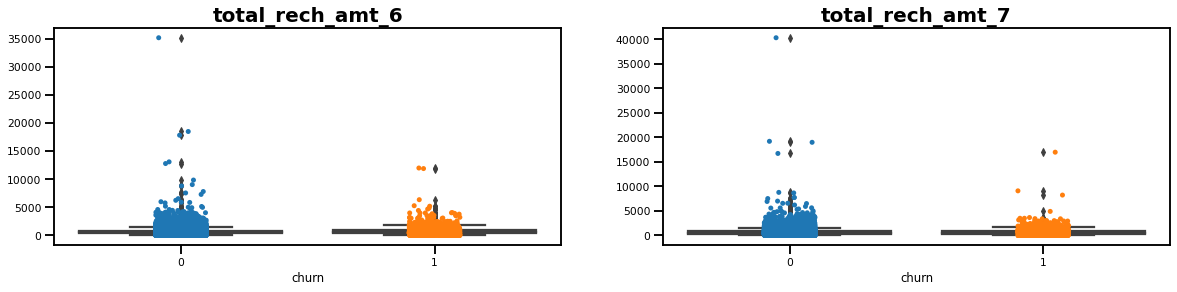

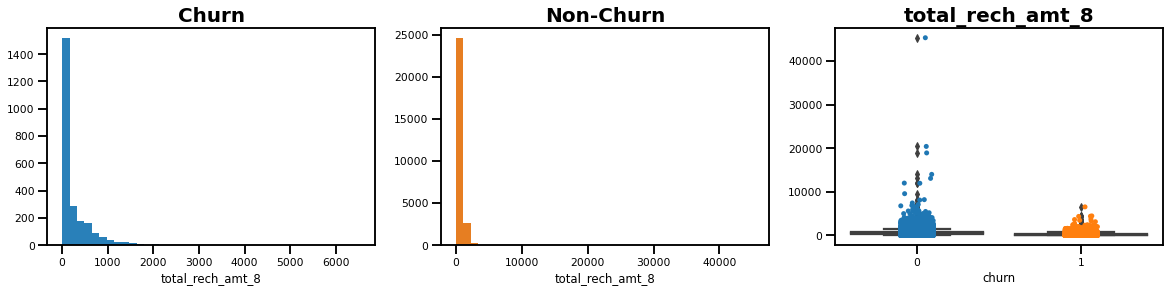

In [47]:
dist_box_plot(telecom,'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8')

`Total recharge amount distribution is getting increased  from 6 to 7th month and then getting decrease in 8th month for Churn customers.`

### max_rech_amt (Max Reacharge Amount)

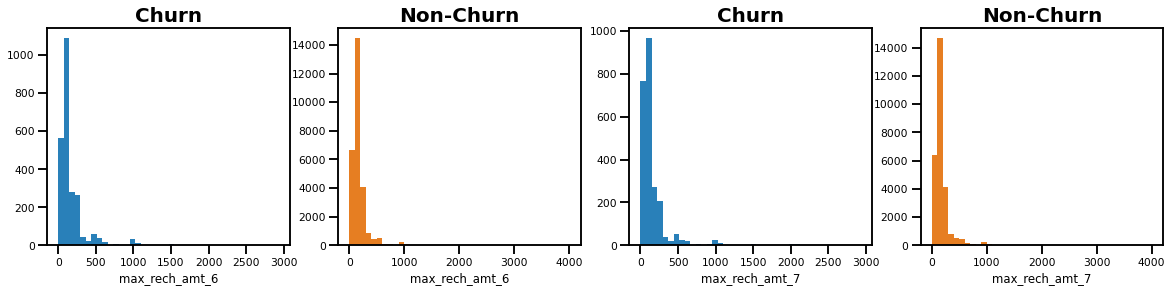

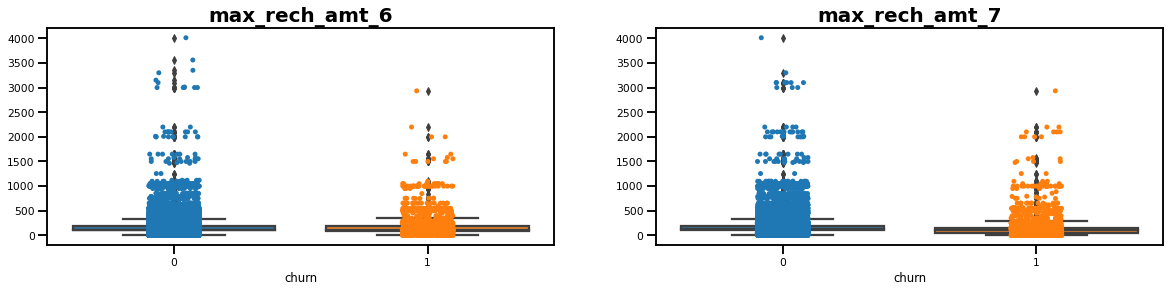

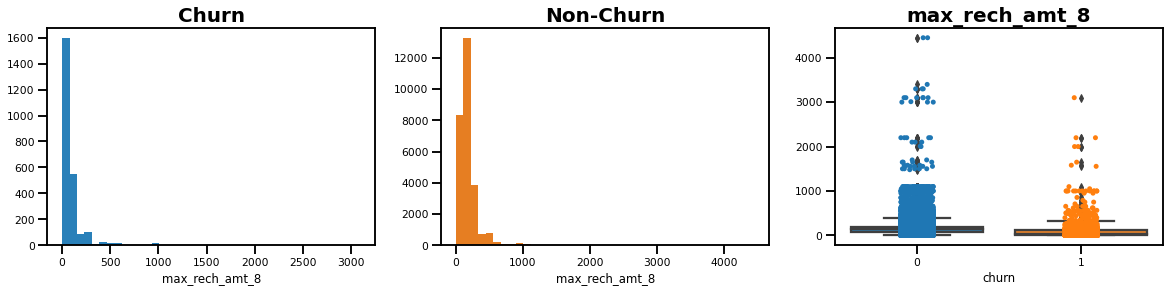

In [48]:
dist_box_plot(telecom,'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8')

`Looks like Max Recharge Amount is decreased in 8th month for Churn customers.`

### last_day_rch_amt (Last day Reacharge Amount)

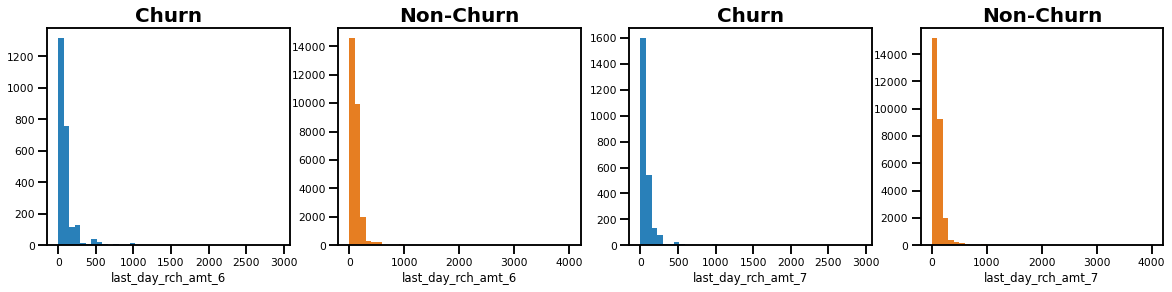

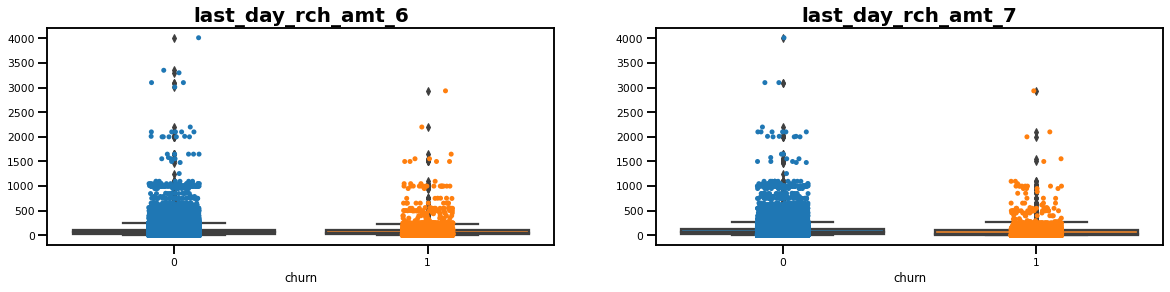

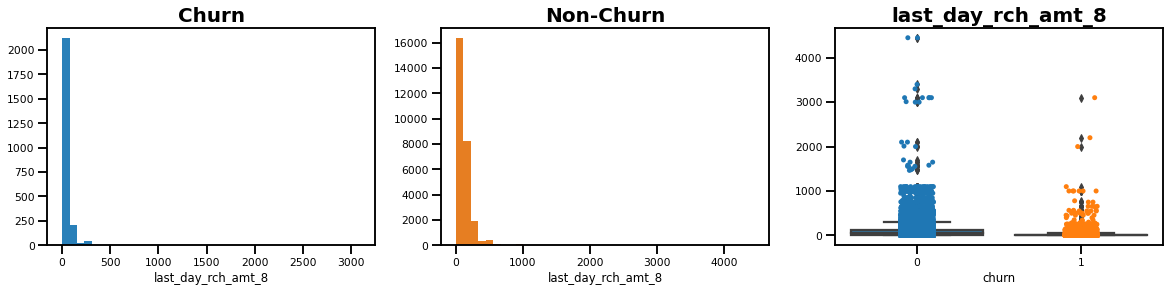

In [49]:
dist_box_plot(telecom,'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8')

`Last day Reacharge decreased in in 8th month for churn customers.`

### max_rech_data (Max Reachrge Data)

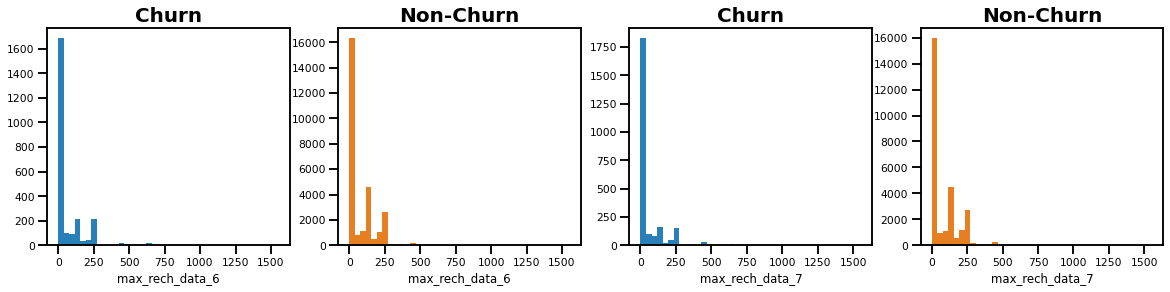

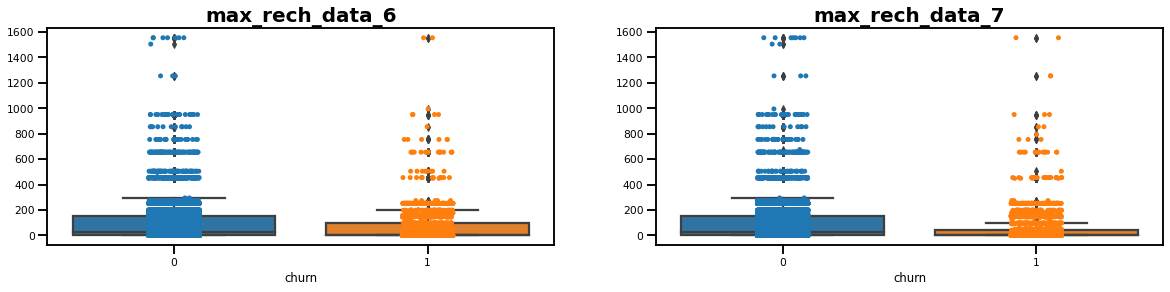

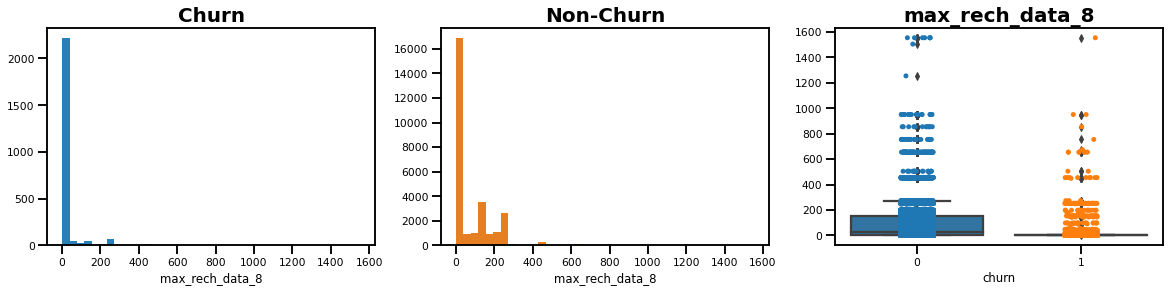

In [50]:
dist_box_plot(telecom,'max_rech_data_6','max_rech_data_7','max_rech_data_8')

`Max recharge data reduced for 8th month churn customers.It looks like many customers are using high data as their huge outliers.`

### av_rech_amt_data (Average recharge amount data)

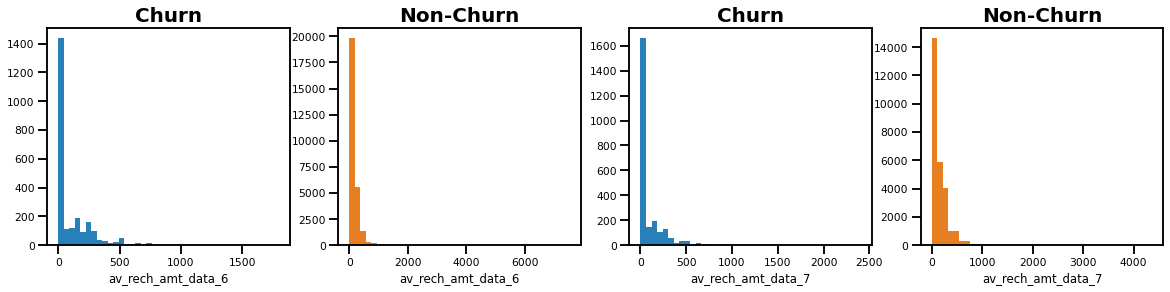

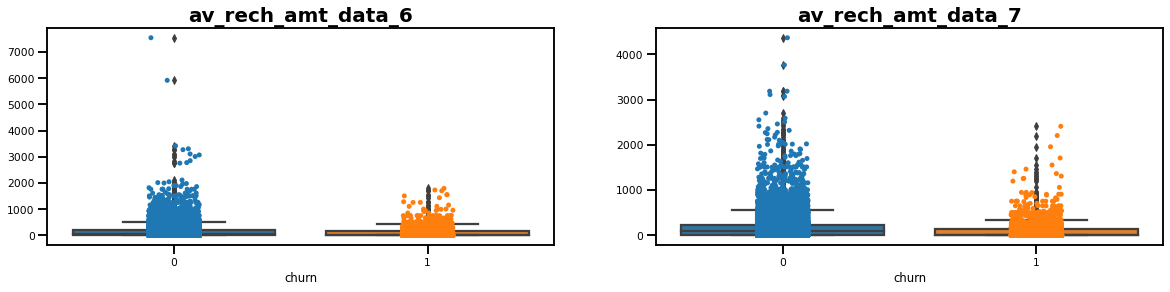

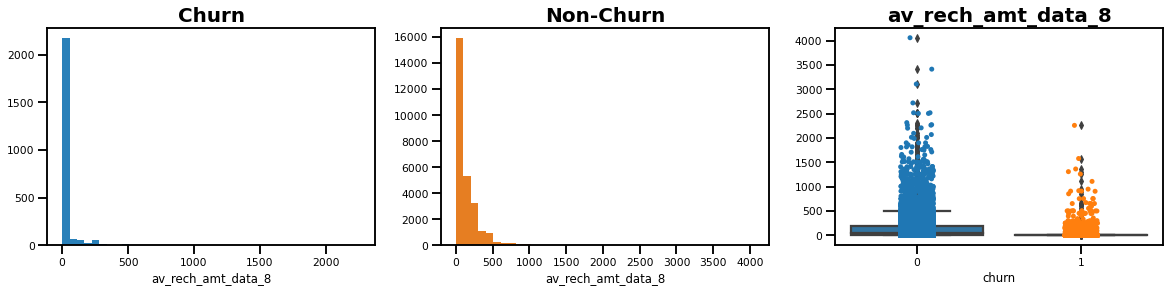

In [51]:
dist_box_plot(telecom,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8')

`Average recharge amount data is decreased in 8th month for churn customers.`

### vol_2g_mb (2g data volume in Mb)

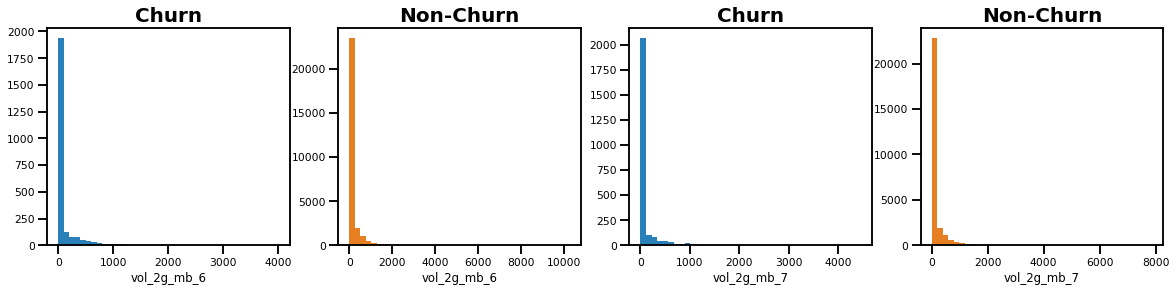

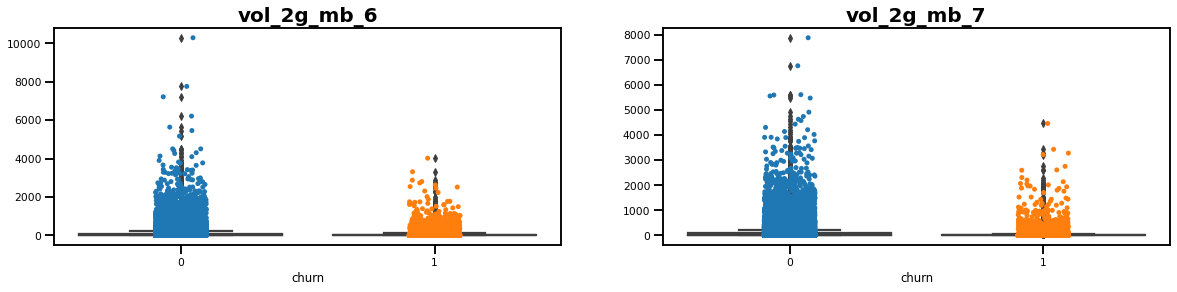

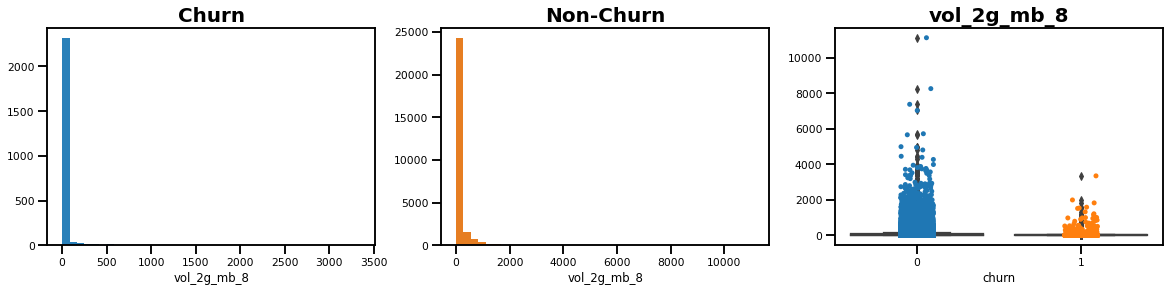

In [52]:
dist_box_plot(telecom,'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8')

`2g data volume in Mb decreased in 8th month for churn customers.`

### vol_3g_mb (3g data volume in Mb)

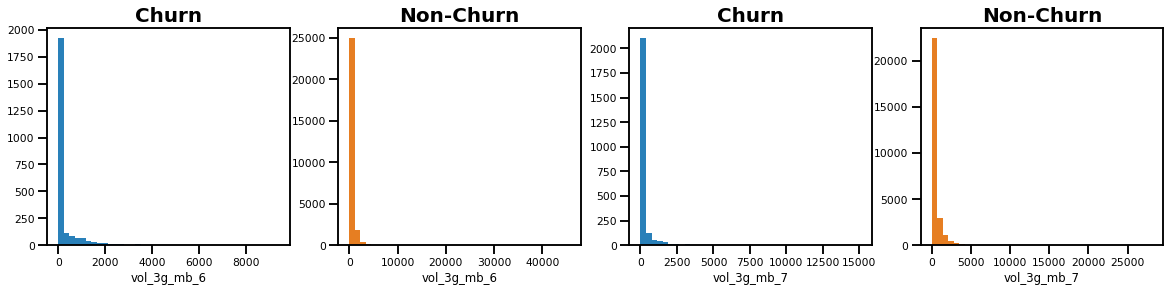

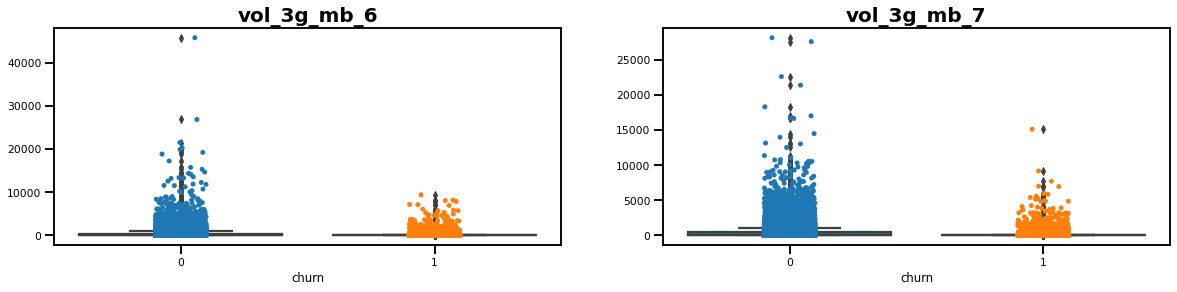

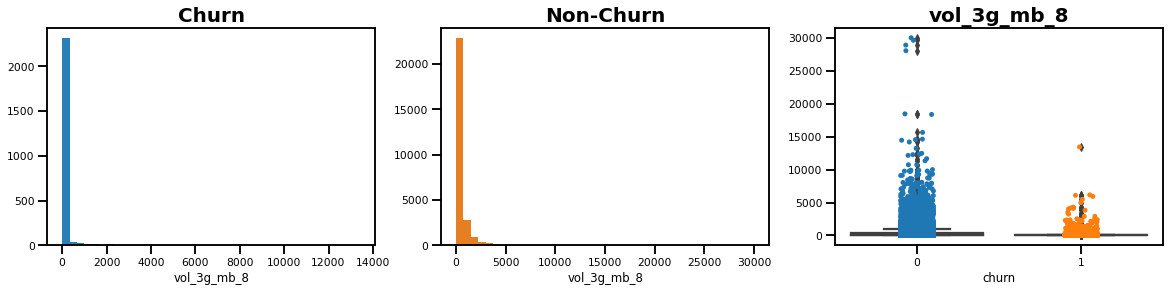

In [53]:
dist_box_plot(telecom,'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8')

`We can see same trend here as 3g data volume in Mb usage decreased in 8th month (for churn customers)`

### arpu_3g (Avg Revenue per user from 3g data)

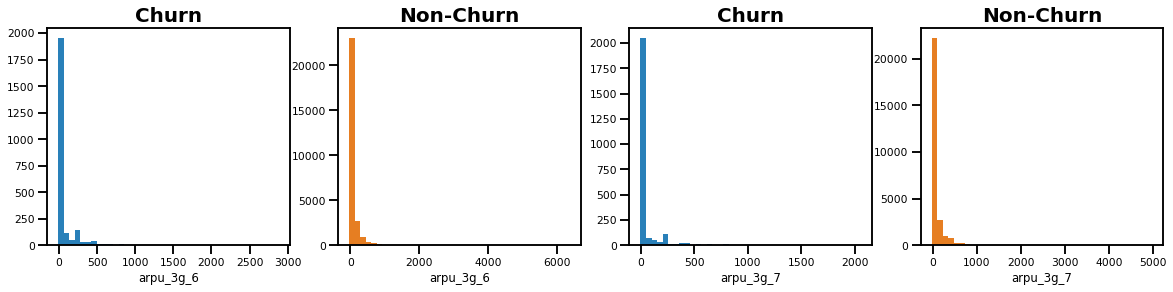

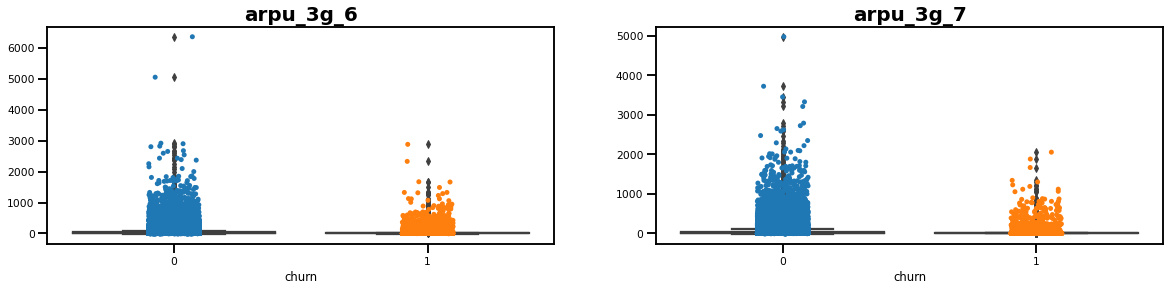

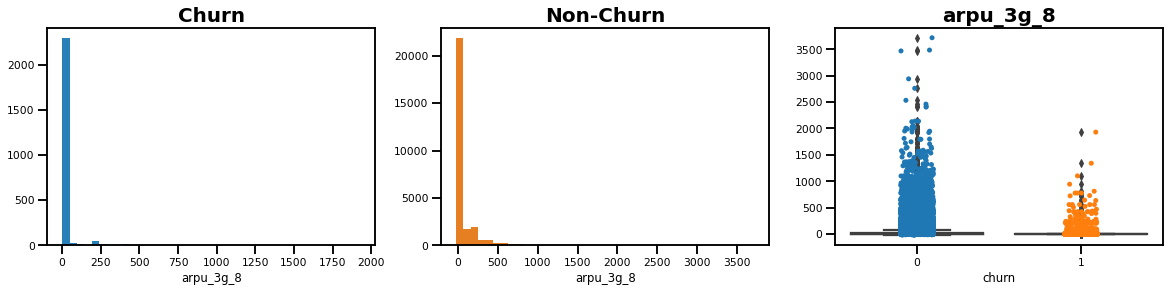

In [54]:
dist_box_plot(telecom,'arpu_3g_6','arpu_3g_7','arpu_3g_8')

`Significant drop in Avg Revenue per user from 3g data in 8th month for churn customers`

### arpu_2g (Avg Revenue per user from 2g data)

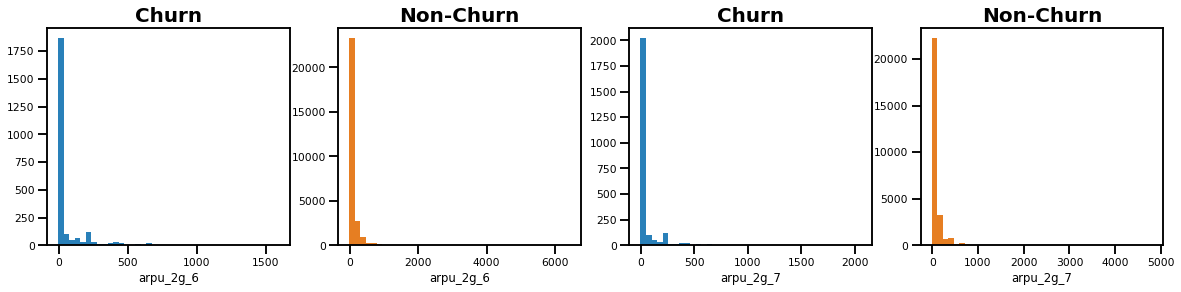

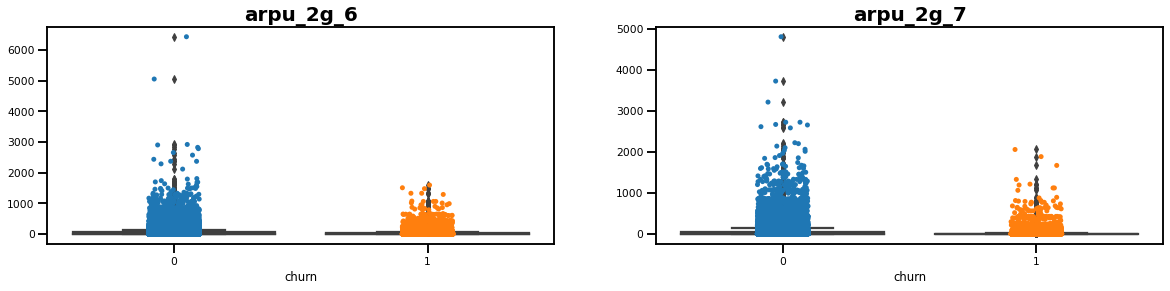

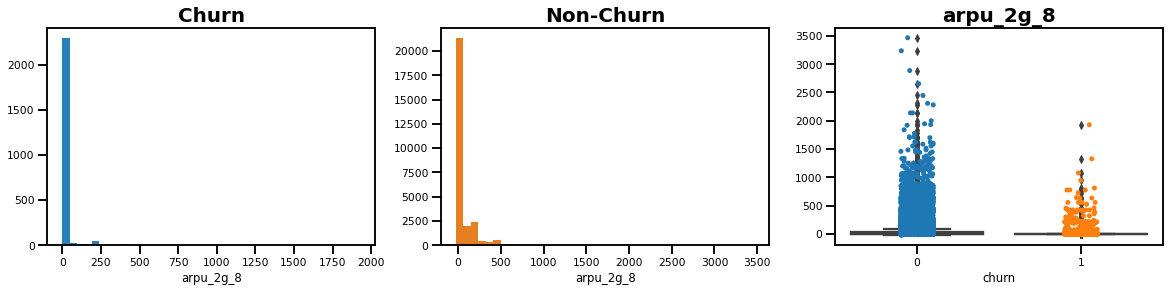

In [55]:
dist_box_plot(telecom,'arpu_2g_6','arpu_2g_7','arpu_2g_8')

`Similalry significant drop in Avg Revenue per user for 2g data for churn customers.`

### month_vbc (Volume based cost - when no specific scheme is not purchased and paid as per usage)

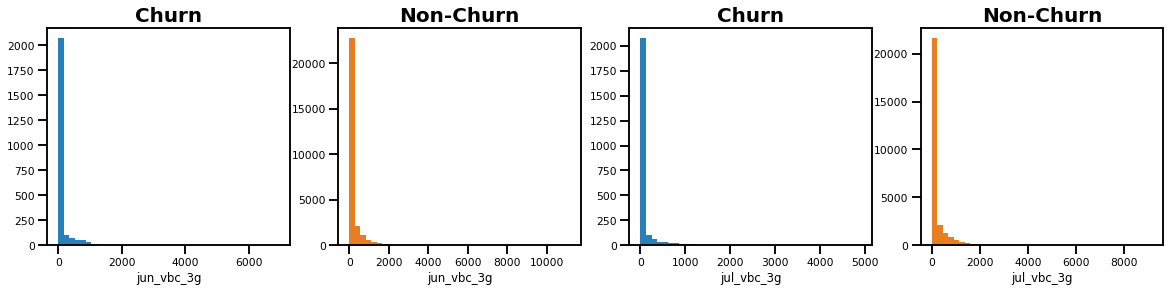

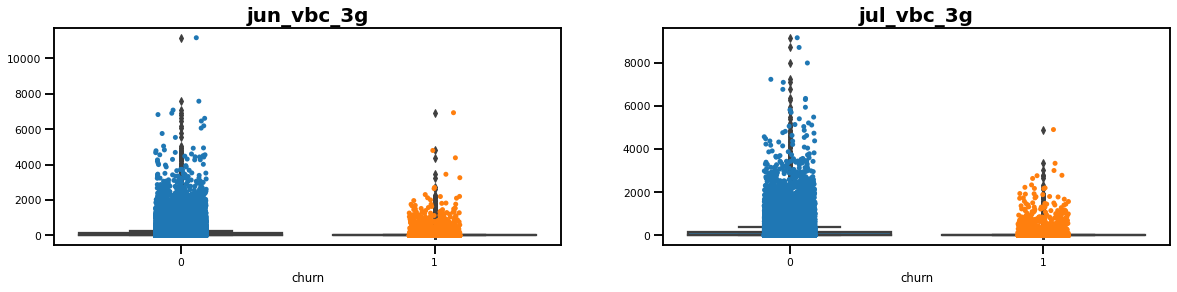

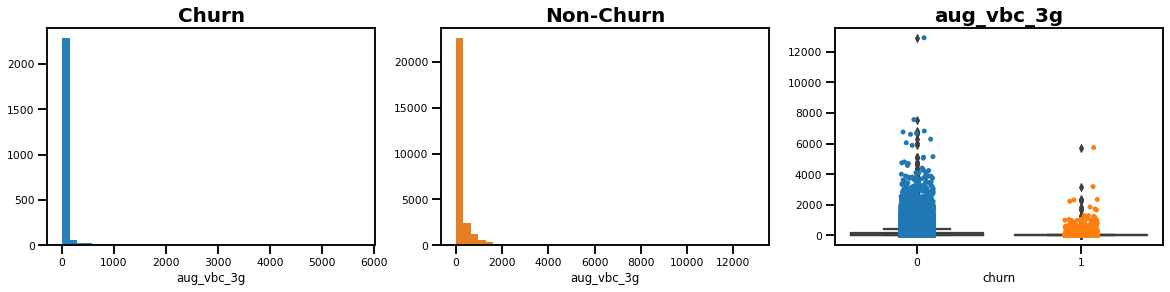

In [56]:
dist_box_plot(telecom,'jun_vbc_3g','jul_vbc_3g','aug_vbc_3g')

`Decrease in Volume based cost - when no specific scheme is not purchased and paid as per usage in 8th month for churn customers`

### tot_amt (Total amount)

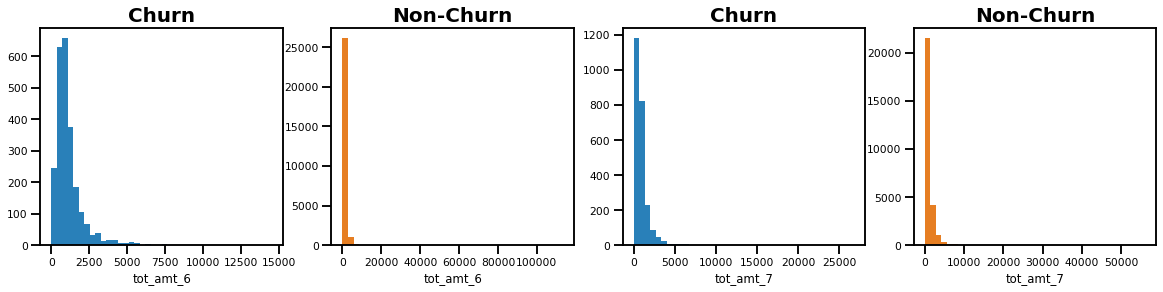

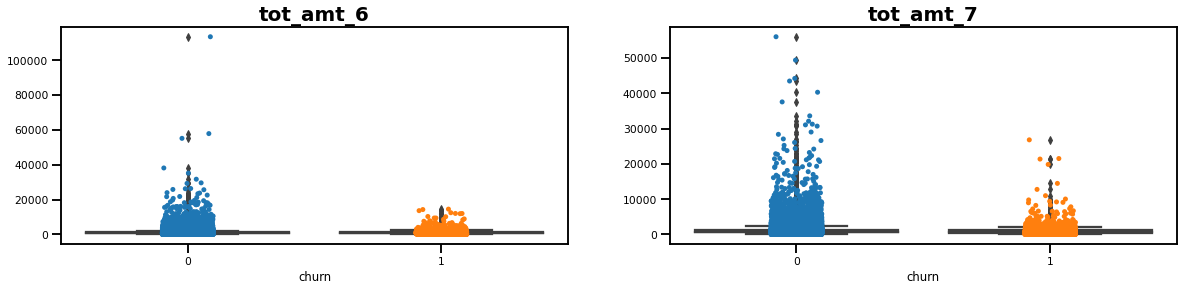

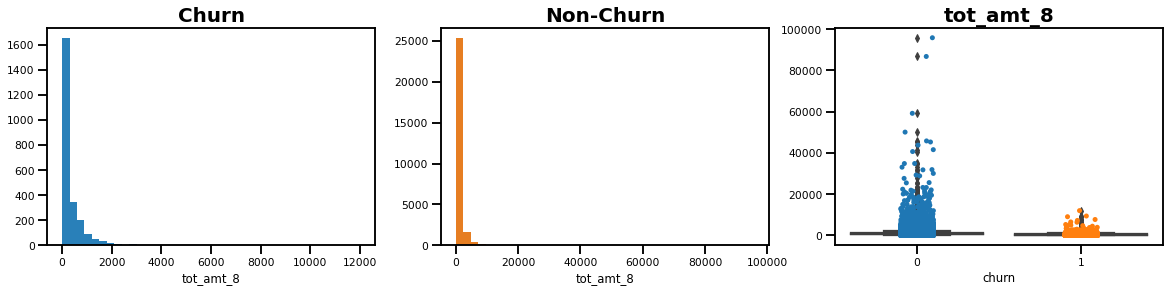

In [57]:
dist_box_plot(telecom,'tot_amt_6','tot_amt_7','tot_amt_8')

`Huge decrease in total amount for churn customers .There are lots of outliers in Total amount ,churn customers count increased from 6th to 8th month and amount is decreased.`

### total_rech_num (Total no of recharges)

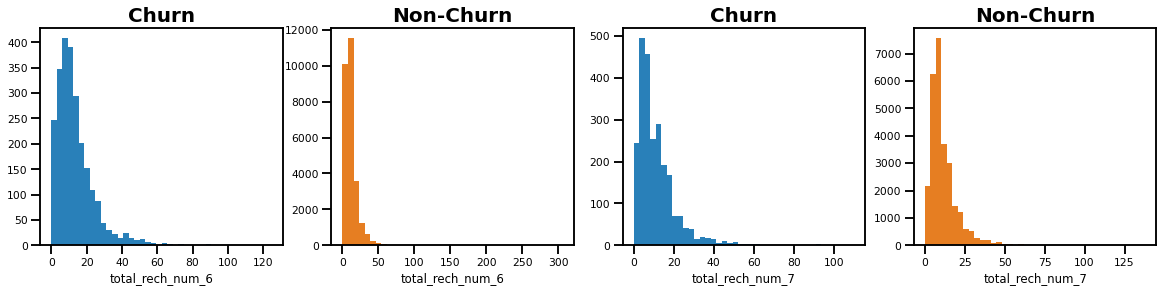

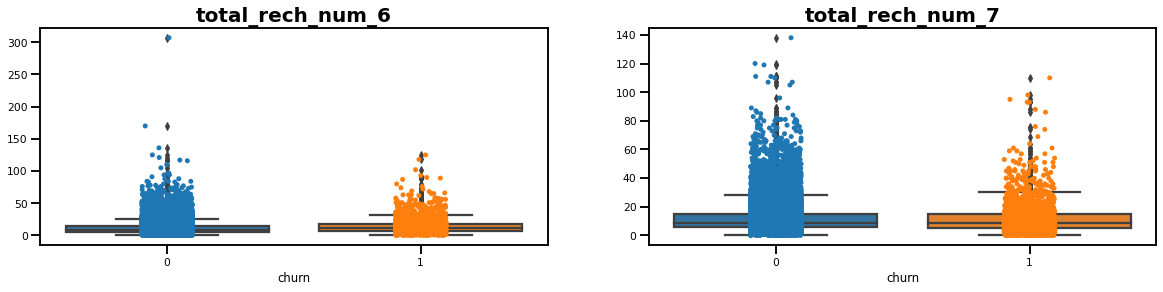

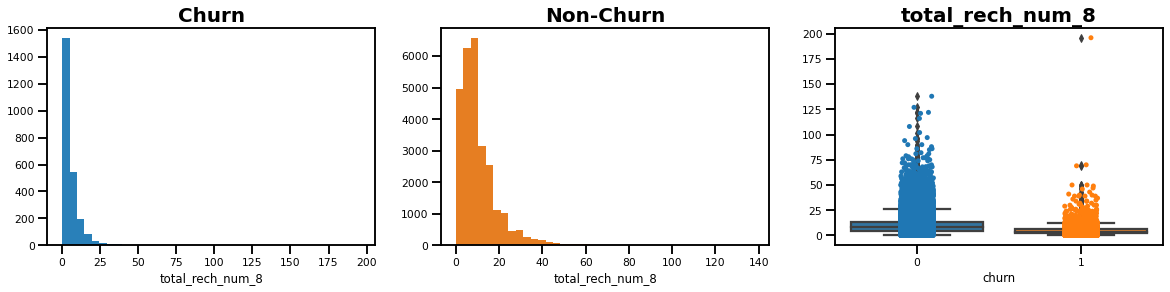

In [58]:
dist_box_plot(telecom,'total_rech_num_6','total_rech_num_7','total_rech_num_8')

### aon(Age on network - number of days the customer is using the operator T network)

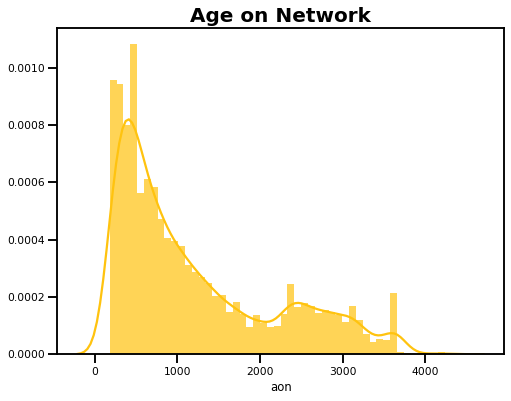

In [59]:
plt.figure(figsize=(8,6))
ax=sns.distplot(telecom['aon'],color='#FFC30F',hist_kws={"alpha": 0.7})
ax.set_title('Age on Network',fontweight='bold',size=20)
plt.show()

`For most of the customers Age on Network is around 800-900 days. There are outliers too as the maximum value is 4321.`

## Categorical columns

### Night pack user

<Figure size 720x432 with 0 Axes>

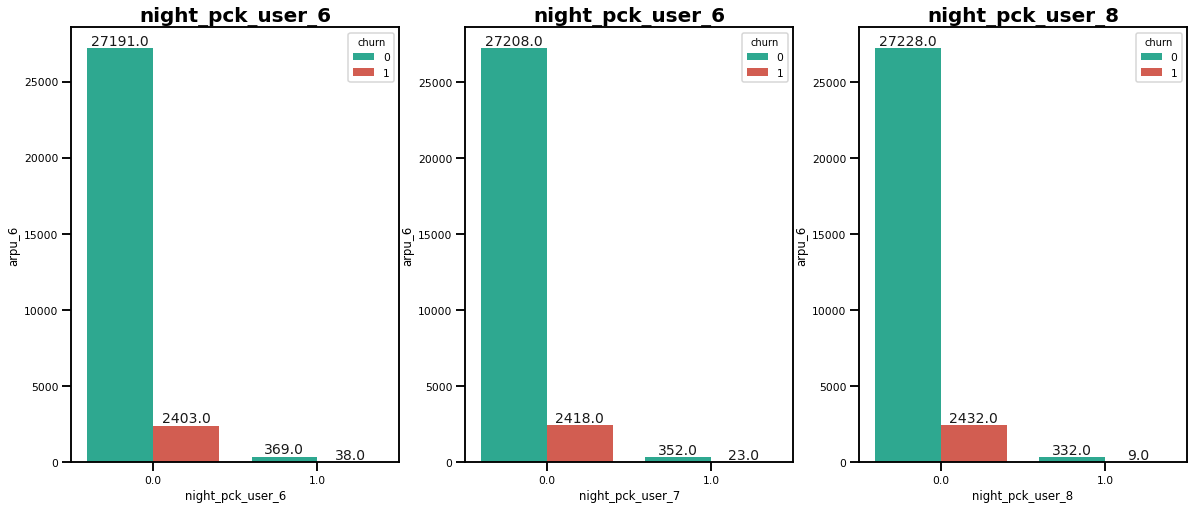

In [60]:
plt.figure(figsize=(10,6))
color=['#1ABC9C','#E74C3C']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[0])
showvalues(ax)
ax.set_title('night_pck_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[1])
showvalues(ax)
ax.set_title('night_pck_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[2])
showvalues(ax)
ax.set_title('night_pck_user_8',fontweight='bold',size=20)
plt.show()

`ARPU is increasing from 6th to 8th month for churn customers who hasn't taken Night Pack service. And ARPU is getting decreased from 6th to 8th month for night pack users. Means moslty churn customers have stopped their night pack facility`

### Fb User

<Figure size 720x432 with 0 Axes>

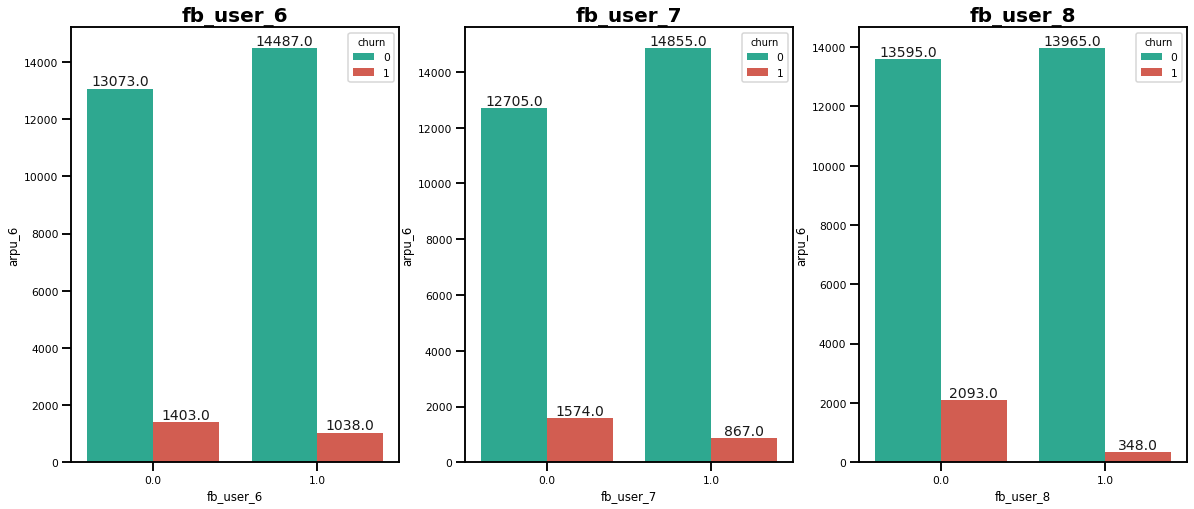

In [61]:
plt.figure(figsize=(10,6))
color=['#1ABC9C','#E74C3C']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
df_temp= pd.DataFrame(telecom.groupby(['fb_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[0])
showvalues(ax)
ax.set_title('fb_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['fb_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[1])
showvalues(ax)
ax.set_title('fb_user_7',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['fb_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[2])
showvalues(ax)
ax.set_title('fb_user_8',fontweight='bold',size=20)
plt.show()

`Significant drop in average revenue in 8th month (churn customers)  for the users who are avaialing fb_user facility.However ARPU is increasing for churn users who arent avaialing fb_users facility.`

In [62]:
# Function to plot columns related to minutes of usage with month
def plot_Churn_Mou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=telecom.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [63]:
# Function to plot columns related to minutes of usage with month
def plot_Churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(telecom.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

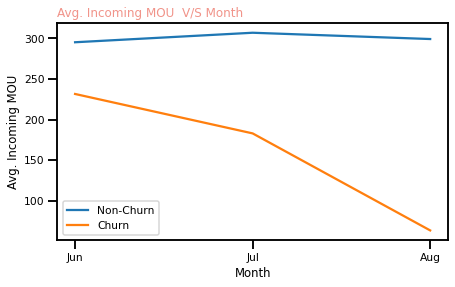

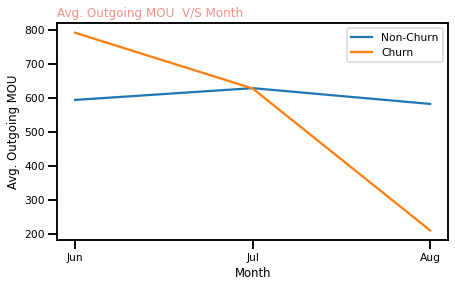

In [64]:
ic_mou = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_mou = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_Churn_Mou(ic_mou,'Incoming')
plot_Churn_Mou(og_mou,'Outgoing')

`Significant drop in total incoming calls and total outgoing calls for churn customers , however for non churn customer its increasing.`

# Data Preparation

## Feature Engineering

`Creating derived features: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 These features will hold the ratio (=total_ogmou / total_icmou) for each month. These features will combine both incoming and outgoing informations and should be a better predictor of churn.`

In [65]:
# Creating new features which are ratio of total outgoing call with total incoming calls minutes of usage.
for i in range(6,9):
    telecom['tot_og_to_ic_mou_'+str(i)] = (telecom['total_og_mou_'+str(i)])/(telecom['total_ic_mou_'+str(i)]+1)

`Creating derived features: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8 These features will hold the ratio (=loc_ogmou / loc_icmou) for each month. These features will combine the local calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [66]:
# Creating new features which are ratio of local outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['loc_og_to_ic_mou_'+str(i)] = (telecom['loc_og_mou_'+str(i)])/(telecom['loc_ic_mou_'+str(i)]+1)

`Creating derived features: roam_og_to_ic_mou_6, roam_og_to_ic_mou_7, roam_og_to_ic_mou_8 These features will hold the ratio (=roam_og_mou / roam_ic_mou) for each month. These features will combine the roaming calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [67]:
# Creating new features which are ratio of roaming outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['roam_og_to_ic_mou_'+str(i)] = (telecom['roam_og_mou_'+str(i)])/(telecom['roam_ic_mou_'+str(i)]+1)

`Creating derived features: spl_og_to_ic_mou_6, spl_og_to_ic_mou_7, spl_og_to_ic_mou_8 These features will hold the ratio (=spl_og_mou / spl_ic_mou) for each month. These features will combine the Special calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [68]:
# Creating new features which are ratio of Special outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['spl_og_to_ic_mou_'+str(i)] = (telecom['spl_og_mou_'+str(i)])/(telecom['spl_ic_mou_'+str(i)]+1)

`Creating derived features: std_og_to_ic_mou_6, std_og_to_ic_mou_7, std_og_to_ic_mou_8 These features will hold the ratio (=std_og_mou / std_ic_mou) for each month. These features will combine the std calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [69]:
# Creating new features which are ratio of std outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['std_og_to_ic_mou_'+str(i)] = (telecom['std_og_mou_'+str(i)])/(telecom['std_ic_mou_'+str(i)]+1)

`Creating derived features: isd_og_to_ic_mou_6, isd_og_to_ic_mou_7, isd_og_to_ic_mou_8 These features will hold the ratio (=isd_og_mou / isd_ic_mou) for each month. These features will combine the isd calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [70]:
# Creating new features which are ratio of isd outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['isd_og_to_ic_mou_'+str(i)] = (telecom['isd_og_mou_'+str(i)])/(telecom['isd_ic_mou_'+str(i)]+1)

### tot_og_to_ic_mou( Total outgoing mou to incoming mou)

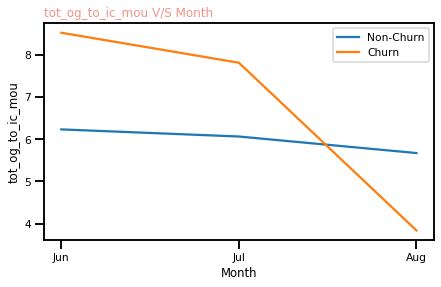

In [71]:
plot_Churn(telecom,'tot_og_to_ic_mou')

`As the ratio of outgoing to incoming seesm to be getting dropped for churn customer , we can say incoming calls were less in Jun and singificantly increases which cause the ratio to drop.`

### loc_og_to_ic_mou( Local outgoing mou to incoming mou)

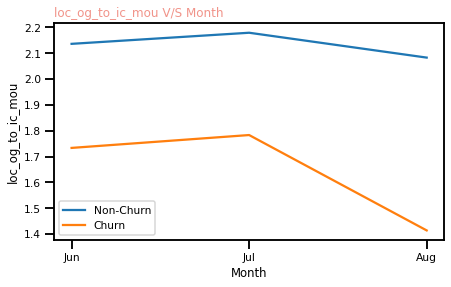

In [72]:
plot_Churn(telecom,'loc_og_to_ic_mou')

`Ratio is getting dropped for churn customers`

### std_og_to_ic_mou( Std outgoing mou to incoming mou)

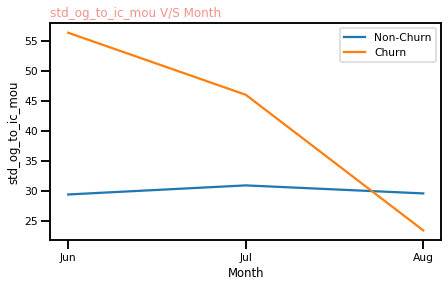

In [73]:
plot_Churn(telecom,'std_og_to_ic_mou')

### total_amount (Total amount)

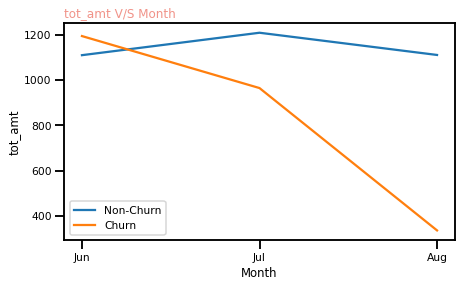

In [74]:
plot_Churn(telecom,'tot_amt')

`Total amount spent tends to decrease for the churn customers.`

`Creating derived features: total_vol_data - Combining vol_2g_mb and vol_3g_mb. These features will combine the 2g data usage and 3g data usage and should be a better predictor of churn.`

In [75]:
# Creating new features combining 2g and 3g
for i in range(6,9):
    telecom['total_vol_'+str(i)] = (telecom['vol_2g_mb_'+str(i)])+(telecom['vol_3g_mb_'+str(i)])

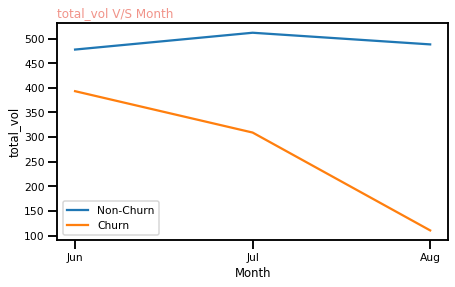

In [76]:
plot_Churn(telecom,'total_vol')

`Total data volume decreases for churn customer decreases as we go from jun to Aug.`

`Creating derived features: total_arpu - Combining arpu_2g and arpu_3g. These features will combine the average revenue per user from 2g and 3g data and should be a better predictor of churn.`

In [77]:
# Creating new features combining average revenue per user from 2g and 3g
for i in range(6,9):
    telecom['total_arpu_'+str(i)] = (telecom['arpu_3g_'+str(i)])+(telecom['arpu_3g_'+str(i)])

In [78]:
date_cols=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_6','date_of_last_rech_7',\
         'date_of_last_rech_8']
for col in date_cols:
    telecom[col] = pd.to_datetime(telecom[col],format='%m/%d/%Y',errors='coerce')

In [79]:
telecom['date_of_last_rech_dow_6'] = telecom['date_of_last_rech_6'].dt.dayofweek.astype(str)
telecom['date_of_last_rech_dow_7'] = telecom['date_of_last_rech_7'].dt.dayofweek.astype(str)
telecom['date_of_last_rech_dow_8'] = telecom['date_of_last_rech_8'].dt.dayofweek.astype(str)
telecom['date_of_last_rech_data_dow_6'] = telecom['date_of_last_rech_data_6'].dt.dayofweek.fillna(7).astype(int).astype(str)
telecom['date_of_last_rech_data_dow_7'] = telecom['date_of_last_rech_data_7'].dt.dayofweek.fillna(7).astype(int).astype(str)
telecom['date_of_last_rech_data_dow_8'] = telecom['date_of_last_rech_data_8'].dt.dayofweek.fillna(7).astype(int).astype(str)

In [80]:
# recent recharge date 
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
telecom['last_rech_date'] = telecom[cols].max(axis=1)
# number of days from  the recent charge date till last date of Aug/8th month
telecom['days_since_last_rech'] = np.floor(( pd.to_datetime('2014-08-31',\
                                                         format='%Y-%m-%d') - telecom['last_rech_date'] ).astype('timedelta64[D]'))
# subtract it from 3 to add higher weightage for values present in all the columns. 
# len(cols) = 3,  means present in all columns, 0 means not present in any column
telecom['rech_weightage'] = len(cols) - (telecom[cols].isnull().sum(axis=1))
telecom.drop(['last_rech_date','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

# recent recharge date 
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
telecom['last_rech_data_date'] = telecom[cols].max(axis=1)
# number of days from  the recent charge date till last date of Aug/8th month
telecom['days_since_last_data_rech'] = np.floor(( pd.to_datetime('2014-08-31',\
                                                         format='%Y-%m-%d') - telecom['last_rech_data_date'] ).astype('timedelta64[D]'))
telecom['days_since_last_data_rech'] = telecom['days_since_last_data_rech'].fillna(0)
# subtract it from 3 to add higher weightage for values present in all the columns. 
# len(cols) = 3,  means present in all columns, 0 means not present in any column
telecom['rech_data_weightage'] = len(cols) - (telecom[cols].isnull().sum(axis=1))
telecom.drop(['last_rech_data_date','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)

In [81]:
catg =['night_pck_user_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6',\
       'night_pck_user_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','fb_user_7',\
       'date_of_last_rech_dow_6','date_of_last_rech_dow_7','date_of_last_rech_data_dow_6','date_of_last_rech_data_dow_7',\
       'date_of_last_rech_dow_8','date_of_last_rech_data_dow_8','night_pck_user_8','monthly_2g_8','sachet_2g_8',\
       'monthly_3g_8','sachet_3g_8','fb_user_8']
catg1 =['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7',\
       'date_of_last_rech_dow_6','date_of_last_rech_dow_7','date_of_last_rech_data_dow_6','date_of_last_rech_data_dow_7',\
       'date_of_last_rech_dow_8','date_of_last_rech_data_dow_8','night_pck_user_8','monthly_2g_8','sachet_2g_8',\
       'monthly_3g_8','sachet_3g_8','fb_user_8']
num_col = list(set(telecom.columns).difference(set(catg)))

#### Creating new features which will be average  of all columns for 6th, 7th 

In [82]:
#filtering columns name by removing only last charcter of column name
col_list = telecom.select_dtypes(include=['float64',\
                                          'int64']).filter(regex='_6|_7').drop(catg[:12],axis=1).drop(['avg_amt_6_7','og_others_6'],axis=1).columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    col_name = 'avg67_'+col # lets create the column name dynamically
    col6 = col+'_6'
    col7 = col+'_7'
    telecom[col_name] = round((telecom[col6]  + telecom[col7])/ 2,2)

In [83]:
## Deriving columns difference between 8 month column and avg of 6th and 7th column calculated above
col_list1 = telecom.select_dtypes(include=['float64',\
                                          'int64']).filter(regex='avg67_').columns
col_list2 = telecom.select_dtypes(include=['float64',\
                                          'int64']).filter(regex='_8').drop(['fb_user_8','night_pck_user_8'],axis=1).columns
for col1,col2 in zip(col_list1,col_list2):
    col_name=col2[:-2]+'_avgdiff8'
    telecom[col_name]=telecom[col2]-telecom[col1]
    

In [84]:
#Dropping those columns since we already created features from it(dropping because of multicollinearity)
col_list = telecom.select_dtypes(include=['float64',\
                'int64']).filter(regex='_6|_7').drop(catg[:12],axis=1).drop(['avg_amt_6_7','og_others_6'],axis=1).columns
telecom.drop(col_list,axis=1,inplace=True)
num_col = list(set(telecom.columns).difference(set(catg)))

#### Creating dummy variables for categorical variables

In [85]:
dummy_df=pd.get_dummies(telecom[catg],drop_first=True)
telecom=pd.concat([telecom,dummy_df],axis=1)
telecom= telecom.drop(catg,axis=1)

##  Handling Skewness

In [86]:
# Lets find out if numerical predictor variables are largely skewed or not
telecom_numerical=telecom[num_col]
skew_features = telecom_numerical.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
pd.DataFrame(skew_features,columns=['Skewness']).head(10)

,Skewness
roam_og_to_ic_mou_8,168.378029
avg67_isd_og_to_ic_mou,153.210816
isd_og_to_ic_mou_8,148.243237
og_others_6,110.070897
avg67_roam_og_to_ic_mou,108.020078
avg67_isd_og_mou,88.242880
isd_og_mou_8,88.041259
avg67_spl_ic_mou,58.158701
avg67_ic_others,55.167106
loc_og_to_ic_mou_8,54.529646


`As we can see from skewness values, predictor variables are highly skewed. We need to take care of skewness.`

In [87]:
#Removing Skewness
num_col.remove('churn')
qntle_trnsfrm=QuantileTransformer()
telecom[num_col]= qntle_trnsfrm.fit_transform(telecom[num_col])

## Handling Imbalance Dataset

`There are many techniques available. I am using ADASYN(Adaptive Synthetic) which is an improved version of SMOTE.
What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.`

In [88]:
X=telecom.drop('churn',axis=1) #Independent/predictor variable
y=telecom['churn'] #output variables
randm_state= 42 # fixing random state to use same state wherever applicable

In [89]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randm_state)
print(X_train.shape)
print(X_test.shape)

(24000, 205)
(6001, 205)


`There are many techniques available. I am using SMOTE.`

In [90]:
smt = SMOTE()
X_train,y_train = smt.fit_sample(X_train,y_train)


### Scaling

In [91]:
# scaling using StandardScaler scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X=scaler.fit_transform(X)

### Applying PCA

In [92]:
# We are going with PCA 0.9 variance or 90% information
pca=PCA(0.9)
df_train=pca.fit_transform(X_train)
df_train.shape

(44050, 75)

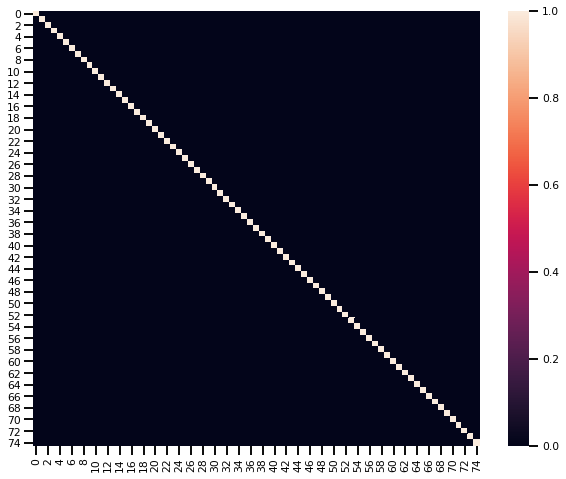

In [93]:
# Lets see correlation between these new PCA  features
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(df_train).corr())

`All principal components are uncorrelated with each other`

In [94]:
#intializing PCA with n_components=61
pca=PCA(n_components=70,random_state=randm_state,svd_solver='randomized')
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [95]:
#transforming X also using PCA, since we will use it during cross validation
pca=PCA(n_components=70,random_state=42,svd_solver='randomized')
X_pca=pca.fit_transform(X)

In [96]:
#Function to plot accuracy metrics
def model_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    TP=confusion[1,1] #True positives
    TN= confusion[0,0] #True Negatives
    FP=confusion[0,1] #False Positives
    FN= confusion[1,0] #False Negatives
    acc_score = round(accuracy_score(actual, predicted),2) #accuracy score
    rcl_score=round(recall_score(actual, predicted),2) #recall score
    roc_score = round(roc_auc_score(actual, predicted),2) # roc_auc score
    fpr = round(FP/float(TN+FP),2) #False Positive Ration
    specificity = round(TN/float(TN+FP),2) #False Positive Ration
    metrics_df = pd.DataFrame(data=[[acc_score,roc_score,fpr,\
                                     specificity,rcl_score,TP,\
                                     TN,FP,FN,]],columns=['accuracy','roc_auc','fpr','specificity','recall_score',\
                                                          'true_positive','true_negative',\
                                                          'false_positive','false_negative'],index=['score'])
    return metrics_df

# Data Modelling 

In [97]:
# Function to predict class labels based on model predicted probabilty and cutoff/threshold for assigning labels
def predictChurnlabeloncutoff(model,X,y,threshold=0.5):
    pred_probs = model.predict_proba(X)[:,1]
    pred_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>threshold else 0
    pred_df['predicted'] = pred_df.churn_Prob.map( lambda x: 1 if x > threshold else 0)
    return pred_df

In [98]:
def optimal_cutoff(df):
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','specificity'])
    from sklearn.metrics import confusion_matrix

    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        
        cm1 = confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    cutoff_df.plot.line(x='prob', y=['accuracy','recall','specificity'],figsize=(8,6))
    plt.show()

### Note: We want to predict customers who are likely to churn(positive class). Hence, we want to maximize(Recall/Senstivity). Also, we don't want to drop accuracy or roc_auc value much while maximising recall.

## BaseLine Models (Without tuning hyperparameters, Running with default parameters)

# Naive Bayes Classifier

In [99]:
gnb=GaussianNB()
gnb.fit(X_train_pca,y_train)
y_test_pred=gnb.predict(X_test_pca)
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      5535
           1       0.16      0.40      0.23       466

    accuracy                           0.79      6001
   macro avg       0.55      0.61      0.55      6001
weighted avg       0.88      0.79      0.83      6001

Confusion Matrix:

[[4555  980]
 [ 281  185]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.79,0.61,0.18,0.82,0.4,185,4555,980,281


# Logistic Regression (Default parameters)

In [100]:
log_reg= LogisticRegression(random_state=randm_state,class_weight='balanced')
log_reg.fit(X_train_pca,y_train) #fitting model
y_test_pred=log_reg.predict(X_test_pca) #model prediction
print(classification_report(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      5535
           1       0.38      0.72      0.50       466

    accuracy                           0.89      6001
   macro avg       0.68      0.81      0.72      6001
weighted avg       0.93      0.89      0.90      6001



,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.89,0.81,0.1,0.9,0.72,334,4986,549,132


# Logistic Regression( Tuned Hyperameters)

In [101]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=5) #stratified kfold for cross validation

In [102]:
params={'penalty':['l1'],'C':list(np.power(10.0, np.arange(-2, 3))),'solver':('saga','liblinear'),\
                                          'class_weight':['balanced']}
#we are using scoring metrics Recall
log_regcv=GridSearchCV(LogisticRegression(random_state=randm_state,max_iter=1000),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
log_regcv.fit(X_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_weight': ['balanced'], 'penalty': ['l1'],
                         'solver': ('saga', 'liblinear')},
             return_train_score=True, scoring='recall', verbose=1)

In [103]:
print(log_regcv.best_params_)
print(log_regcv.best_score_)
print(log_regcv.best_estimator_)
# test set prediction using tuned model
log_regcv=log_regcv.best_estimator_


{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
0.9194097616345063
LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')


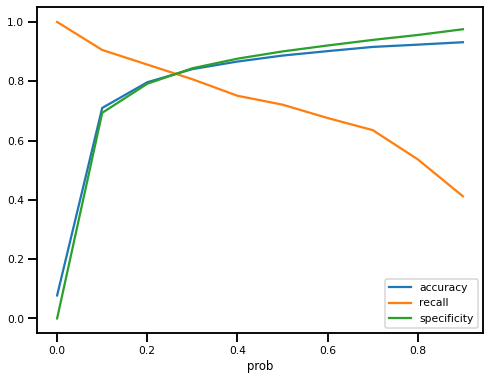

In [104]:
log_regcv.fit(X_train_pca,y_train) #fitting best models
df_cutoff=predictChurnlabeloncutoff(log_regcv,X_test_pca,y_test)
optimal_cutoff(df_cutoff)

In [105]:
threshold=0.25 # from the above graph(recall, accuracy and specificity have good score)
y_test_pred= predictChurnlabeloncutoff(log_regcv,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      5535
           1       0.28      0.83      0.42       466

    accuracy                           0.82      6001
   macro avg       0.63      0.83      0.66      6001
weighted avg       0.93      0.82      0.86      6001

Confusion Matrix:

[[4557  978]
 [  79  387]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.82,0.83,0.18,0.82,0.83,387,4557,978,79


# KNN (Using Default paramters)

In [106]:
knn=KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
y_test_pred = knn.predict(X_test_pca)
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      5535
           1       0.19      0.89      0.31       466

    accuracy                           0.69      6001
   macro avg       0.59      0.78      0.55      6001
weighted avg       0.92      0.69      0.76      6001

Confusion Matrix:

[[3717 1818]
 [  53  413]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.69,0.78,0.33,0.67,0.89,413,3717,1818,53


# KNN (Tuned Hyperameters)

In [107]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3) #stratified kfold for cross validation
#params={'n_neighbors': list(range(1,6)), 'p':[1,2],'weights':['uniform', 'distance']}
# Setting params to tuned values, since it takes around 3hrs for 30 fits with knn
params={'n_neighbors':[3], 'p':[2]} #I ran gridsearchcv on above paramgerids with 30 fits and found these tuned params
#we are using scoring metrics Recall
knn_cv=GridSearchCV(KNeighborsClassifier(),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
knn_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3], 'p': [2]}, return_train_score=True,
             scoring='recall', verbose=1)

In [108]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)
print(knn_cv.best_estimator_)
# test set prediction using tuned model
knn_cv=knn_cv.best_estimator_ # best parameters value for knn

{'n_neighbors': 3, 'p': 2}
0.9996367866965757
KNeighborsClassifier(n_neighbors=3)


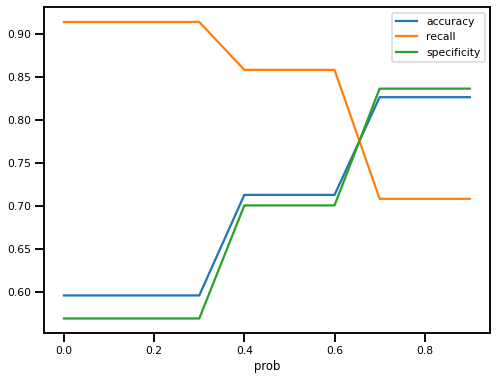

In [109]:
knn_cv.fit(X_train_pca,y_train) #fitting best models
df_cutoff=predictChurnlabeloncutoff(knn_cv,X_test_pca,y_test)
optimal_cutoff(df_cutoff)


In [110]:
threshold=0.45 #from graph, at 0.45 we can have good score for recall(objective to maximize recall) with decent score for accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(knn_cv,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      5535
           1       0.19      0.86      0.32       466

    accuracy                           0.71      6001
   macro avg       0.59      0.78      0.57      6001
weighted avg       0.92      0.71      0.78      6001

Confusion Matrix:

[[3877 1658]
 [  66  400]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.71,0.78,0.3,0.7,0.86,400,3877,1658,66


# Random Forest(Default parameters)

In [111]:
rfc=RandomForestClassifier(random_state=randm_state)
rfc.fit(X_train_pca,y_train)
y_test_pred= rfc.predict(X_test_pca)
model_metrics(y_test,y_test_pred)

,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.92,0.69,0.04,0.96,0.41,190,5329,206,276


# Random Forest(Tuned Hyperparameters)

`Tuning all hyperparametrs will take large amount of time beacuse of possible combination will for gridsearchcv will be very large. Hence, tuning 1 or 2 hyperparamters at a time.`

### Tuning n_estimators and criterion

In [112]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3)
params={'n_estimators': range(50,150,30)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced'),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  7.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'n_estimators': range(50, 150, 30)},
             return_train_score=True, scoring='recall', verbose=1)

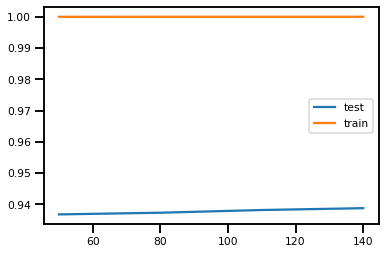

In [113]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)
plt.plot(cv_results['param_n_estimators'],cv_results['mean_test_score'],label='test')
plt.plot(cv_results['param_n_estimators'],cv_results['mean_train_score'],label='train')
plt.legend()


`Taking 80 as n_estimators.`

In [114]:
params={'criterion': ["gini", "entropy"]}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',n_estimators=80),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=80,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy']},
             return_train_score=True, scoring='recall', verbose=1)

In [115]:
rfc_cv.best_params_

{'criterion': 'entropy'}

### Tuning max_features

In [116]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3)
params={'max_features': [5, 10, 15, 20, 25]}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy'),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 17.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              n_estimators=80,
                                              random_state=42),
             param_grid={'max_features': [5, 10, 15, 20, 25]},
             return_train_score=True, scoring='recall', verbose=1)

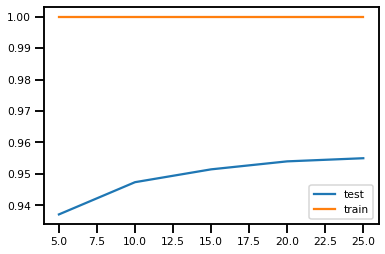

In [117]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)
plt.plot(cv_results['param_max_features'],cv_results['mean_test_score'],label='test')
plt.plot(cv_results['param_max_features'],cv_results['mean_train_score'],label='train')
plt.legend()


` No of features =15 based on above plot`

### Tunning minimum sample leaf

In [118]:
params={'min_samples_leaf': range(50, 200, 50)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=15),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              max_features=15, n_estimators=80,
                                              random_state=42),
             param_grid={'min_samples_leaf': range(50, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

In [119]:
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

{'min_samples_leaf': 50}
0.9120545182246941


In [120]:
### Tunning minimum sample split

In [121]:
params={'min_samples_split': range(50, 200, 50)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=15,min_samples_leaf=50,\
                                          ),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              max_features=15,
                                              min_samples_leaf=50,
                                              n_estimators=80,
                                              random_state=42),
             param_grid={'min_samples_split': range(50, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

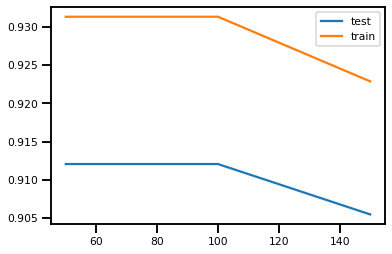

In [122]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)
plt.plot(cv_results['param_min_samples_split'],cv_results['mean_test_score'],label='test')
plt.plot(cv_results['param_min_samples_split'],cv_results['mean_train_score'],label='train')
plt.legend()


`going with 100 samples to take care of overfitting.`

# Tuned Random Forest 

In [123]:
rfc=RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=15,min_samples_leaf=50,\
                                          min_samples_split=100)
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=15, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=80, random_state=42)

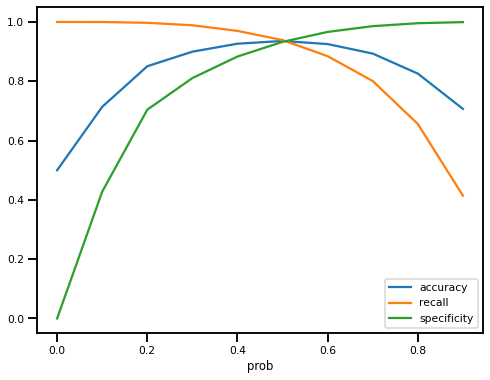

In [124]:
#rfc.fit(X_train_pca,y_train) #fitting best models
df_cutoff=predictChurnlabeloncutoff(rfc,X_train_pca,y_train)
optimal_cutoff(df_cutoff)


In [125]:
# We want recall to be better so going with 0.34, as you can see above from the at0.34 recall is slightly better than accuracy and specificty
threshold=0.34 #from graph, at 0.34 we can have good score for recall, accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(rfc,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5535
           1       0.27      0.81      0.40       466

    accuracy                           0.81      6001
   macro avg       0.62      0.81      0.65      6001
weighted avg       0.93      0.81      0.85      6001

Confusion Matrix:

[[4500 1035]
 [  89  377]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.81,0.81,0.19,0.81,0.81,377,4500,1035,89


# SVM(default parameters)

In [126]:
svc= SVC(random_state=randm_state,class_weight='balanced')
svc.fit(X_train_pca,y_train) #fitting model
y_test_pred=svc.predict(X_test_pca) #model prediction
print(classification_report(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5535
           1       0.53      0.62      0.57       466

    accuracy                           0.93      6001
   macro avg       0.75      0.79      0.77      6001
weighted avg       0.93      0.93      0.93      6001



,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.93,0.79,0.05,0.95,0.62,291,5272,263,175


### SVM(Tuned Hyperparameters)

In [127]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3)
params={'C':list(np.power(10.0, np.arange(-1, 2)))}
#we are using scoring metrics Recall
svc_cv=GridSearchCV(SVC(random_state=randm_state,class_weight='balanced'),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
svc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 12.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0]}, return_train_score=True,
             scoring='recall', verbose=1)

In [128]:
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 10.0}
0.9814755463608394


In [129]:
params={'kernel' :['poly', 'rbf']}
#we are using scoring metrics Recall
svc_cv=GridSearchCV(SVC(random_state=randm_state,class_weight='balanced',C=10),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
svc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(C=10, class_weight='balanced', random_state=42),
             param_grid={'kernel': ['poly', 'rbf']}, return_train_score=True,
             scoring='recall', verbose=1)

# Tuned SVC

In [130]:
svc= SVC(random_state=randm_state,class_weight='balanced',C=0.1,kernel='rbf',probability=True)
svc.fit(X_train_pca,y_train) #fitting model
y_train_pred=svc.predict_proba(X_train_pca) #model prediction

In [131]:
# We are going slightly towards recall score, reason mentioned at starting of data modelling.
threshold=0.4 #from graph, at 0.4 we can have good score for recall, accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(svc,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      5535
           1       0.43      0.68      0.53       466

    accuracy                           0.91      6001
   macro avg       0.70      0.80      0.74      6001
weighted avg       0.93      0.91      0.92      6001

Confusion Matrix:

[[5119  416]
 [ 148  318]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.91,0.8,0.08,0.92,0.68,318,5119,416,148


# Gradient Boosting

In [132]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_pca,y_train)
y_train_pred = gbc.predict_proba(X_train_pca)

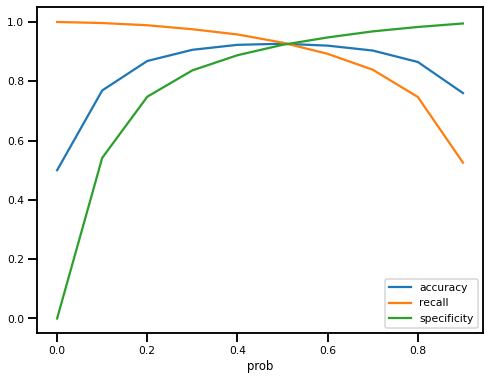

In [133]:
df_cutoff=predictChurnlabeloncutoff(gbc,X_train_pca,y_train)
optimal_cutoff(df_cutoff)


In [134]:
# We are going slightly towards recall score, reason mentioned at starting of data modelling.
threshold=0.3 #from graph, at 0.3 we can have good score for recall, accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(gbc,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5535
           1       0.27      0.82      0.41       466

    accuracy                           0.82      6001
   macro avg       0.63      0.82      0.65      6001
weighted avg       0.93      0.82      0.85      6001

Confusion Matrix:

[[4525 1010]
 [  84  382]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.82,0.82,0.18,0.82,0.82,382,4525,1010,84


# Tuned XGBoost Model (Tuned)

In [135]:
xgb=XGBClassifier(random_state=randm_state ,max_depth = 3 , learning_rate=0.01,\
                  n_estimators=100,objective='binary:logistic')
xgb.fit(X_train_pca,y_train)
y_train_pred = xgb.predict_proba(X_train_pca)


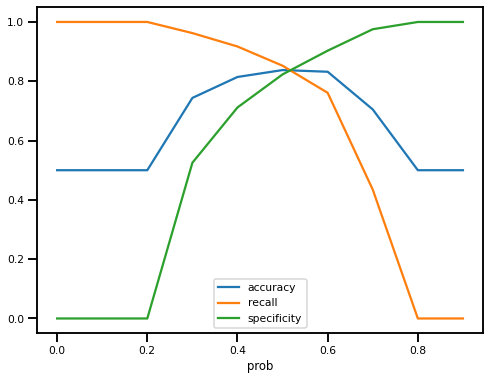

In [136]:
df_cutoff=predictChurnlabeloncutoff(xgb,X_train_pca,y_train) #optimal cutoff
optimal_cutoff(df_cutoff)


In [137]:
# We are going slightly towards recall score, reason mentioned at starting of data modelling.
threshold=0.42 #from graph, at 0.42 we can have good score for recall, accuracy and specificity
y_test_pred= predictChurnlabeloncutoff(xgb,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      5535
           1       0.21      0.88      0.34       466

    accuracy                           0.73      6001
   macro avg       0.60      0.80      0.58      6001
weighted avg       0.93      0.73      0.79      6001

Confusion Matrix:

[[3987 1548]
 [  58  408]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.73,0.8,0.28,0.72,0.88,408,3987,1548,58


`Conclusion of different tuned models:`
- Naive Bayes baseline model with PCA and SMOTE
    - Recall : 40%
- Logistic Regression PCA and SMOTE
    - Recall : 83%
    - Accuracy : 82%
- KNN with PCA and SMOTE   
    - Recall : 86%
    - Accuracy : 71%
- Random Forest with PCA and SMOTE   
    - Recall : 81%
    - Accuracy : 81%
- SVC with PCA and SMOTE   
    - Recall : 68%
- Gradient Boosting with PCA and SMOTE   
    - Recall : 82%
    - Accuracy : 82%
- XGBoost with PCA and SMOTE   
    - Recall : 88%
    - Accuracy : 73%

`XGboost classifie and K Nearest neighbours classifier has maximum recall respectively. We will impelement interpretable model later in this notebook. Since, PCA does transformation of original raw attrinutes to find new variables or Principal components which are orthogonal and uncorrelated to each other. Hence, these model features cannot be used for business.`

`Building another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model and Random Forest classifier. In case of logistic regression, make sure to handle multi-collinearity.`

# Interpretable model for Business understanding: Logistic Regression

In [138]:
X=telecom.drop('churn',axis=1) # Feature variables for new interpretable models
y=telecom['churn'] 
print(X.shape)

(30001, 205)


In [139]:
df_train, df_test = train_test_split(telecom, train_size = 0.7, test_size = 0.3, random_state = randm_state)
print(df_train.shape)
print(df_train.shape)

(21000, 206)
(21000, 206)


In [140]:
y_train = df_train['churn']
X_train = df_train.drop('churn',axis=1)
y_test = df_test['churn']
X_test = df_test.drop('churn',axis=1)


In [141]:
# Scaling
scaler = StandardScaler()
colums = list(X_train.columns)
X_train[colums] = scaler.fit_transform(X_train[colums])
X_test[colums] = scaler.transform(X_test[colums])

In [142]:
log_reg=LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')
# Running RFE with the output number of the variable equal to 30
rfe = RFE(log_reg,20)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [143]:
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=[['column_name','Include','feature_rank']])


,column_name,Include,feature_rank
0,arpu_8,False,186
1,onnet_mou_8,False,185
2,offnet_mou_8,False,184
3,roam_ic_mou_8,False,12
4,roam_og_mou_8,False,45
5,loc_og_t2t_mou_8,False,44
6,loc_og_t2m_mou_8,False,43
7,loc_og_t2f_mou_8,False,42
8,loc_og_t2c_mou_8,False,41
9,loc_og_mou_8,False,40


In [144]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [145]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     487.5
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        07:02:11   Log-Likelihood:                 1269.8
No. Observations:               21000   AIC:                            -2498.
Df Residuals:                   20979   BIC:                            -2331.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [146]:
# lets drop avg67_loc_og_t2f_mou since it has high p value
X_train_rfe_new=X_train_rfe.drop('avg67_loc_og_t2f_mou',axis=1)

In [147]:
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,avg67_total_rech_amt,16.83
11,avg67_arpu,15.85
8,total_vol_8,8.12
4,av_rech_amt_data_8,8.06
1,total_ic_mou_8,1.54
13,avg67_max_rech_amt,1.54
6,tot_og_to_ic_mou_8,1.48
9,days_since_last_rech,1.45
10,days_since_last_data_rech,1.35
0,isd_og_mou_8,1.26


In [148]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     513.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        07:02:11   Log-Likelihood:                 1269.7
No. Observations:               21000   AIC:                            -2499.
Df Residuals:                   20980   BIC:                            -2340.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [149]:
# lets drop vol_2g_mb_avgdiff8 since it has high p value
X_train_rfe_new = X_train_rfe_new.drop('vol_2g_mb_avgdiff8',axis=1)
 

In [150]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,avg67_total_rech_amt,16.82
11,avg67_arpu,15.85
8,total_vol_8,8.09
4,av_rech_amt_data_8,8.04
13,avg67_max_rech_amt,1.54
1,total_ic_mou_8,1.54
6,tot_og_to_ic_mou_8,1.47
9,days_since_last_rech,1.45
0,isd_og_mou_8,1.25
10,days_since_last_data_rech,1.24


In [151]:
# lets drop avg67_total_rech_amt since it has high VIF value
X_train_rfe_new=X_train_rfe_new.drop('avg67_total_rech_amt',axis=1)

In [152]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_vol_8,8.09
4,av_rech_amt_data_8,8.03
11,avg67_arpu,1.65
1,total_ic_mou_8,1.54
12,avg67_max_rech_amt,1.47
9,days_since_last_rech,1.45
6,tot_og_to_ic_mou_8,1.44
0,isd_og_mou_8,1.25
2,isd_ic_mou_8,1.24
10,days_since_last_data_rech,1.22


In [153]:
# lets drop av_rech_amt_data_8 since it has high VIF value
X_train_rfe_new=X_train_rfe_new.drop('av_rech_amt_data_8',axis=1)

In [154]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,avg67_arpu,1.64
1,total_ic_mou_8,1.53
11,avg67_max_rech_amt,1.46
5,tot_og_to_ic_mou_8,1.44
8,days_since_last_rech,1.42
7,total_vol_8,1.28
0,isd_og_mou_8,1.25
2,isd_ic_mou_8,1.24
3,last_day_rch_amt_8,1.22
9,days_since_last_data_rech,1.21


`As we can see VIF value is less than 2, we have taken care of multicollinearity issue between feature variables, Lets do prediction and modelling using these variables`

In [155]:
X_train=X_train[X.columns]
X_test=X_test[X.columns]

In [156]:
log_reg=LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')

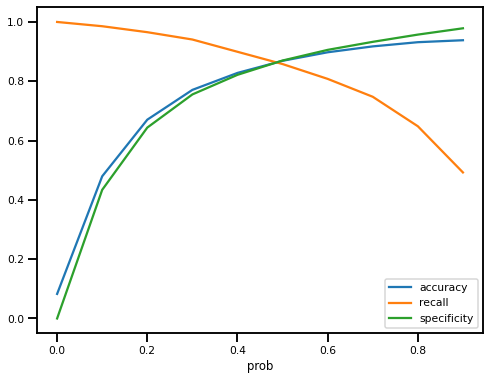

In [157]:
#optimal cutoff
df_cutoff=predictChurnlabeloncutoff(log_reg,X_train,y_train)
optimal_cutoff(df_cutoff)


In [158]:
#As we can see cutoff=0.45 given good recall score as well as accuracy and specificity.
threshold=0.45 #from graph, at 0.45 we can have good score for recall(objective to maximize recall) with decent score for accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(log_reg,X_test,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      8300
           1       0.32      0.87      0.47       701

    accuracy                           0.85      9001
   macro avg       0.65      0.85      0.69      9001
weighted avg       0.93      0.85      0.87      9001

Confusion Matrix:

[[7001 1299]
 [  94  607]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.85,0.85,0.16,0.84,0.87,607,7001,1299,94


In [159]:
feat_imp=log_reg.coef_
feat_imp=np.abs(feat_imp)
len(X_train.columns)

16

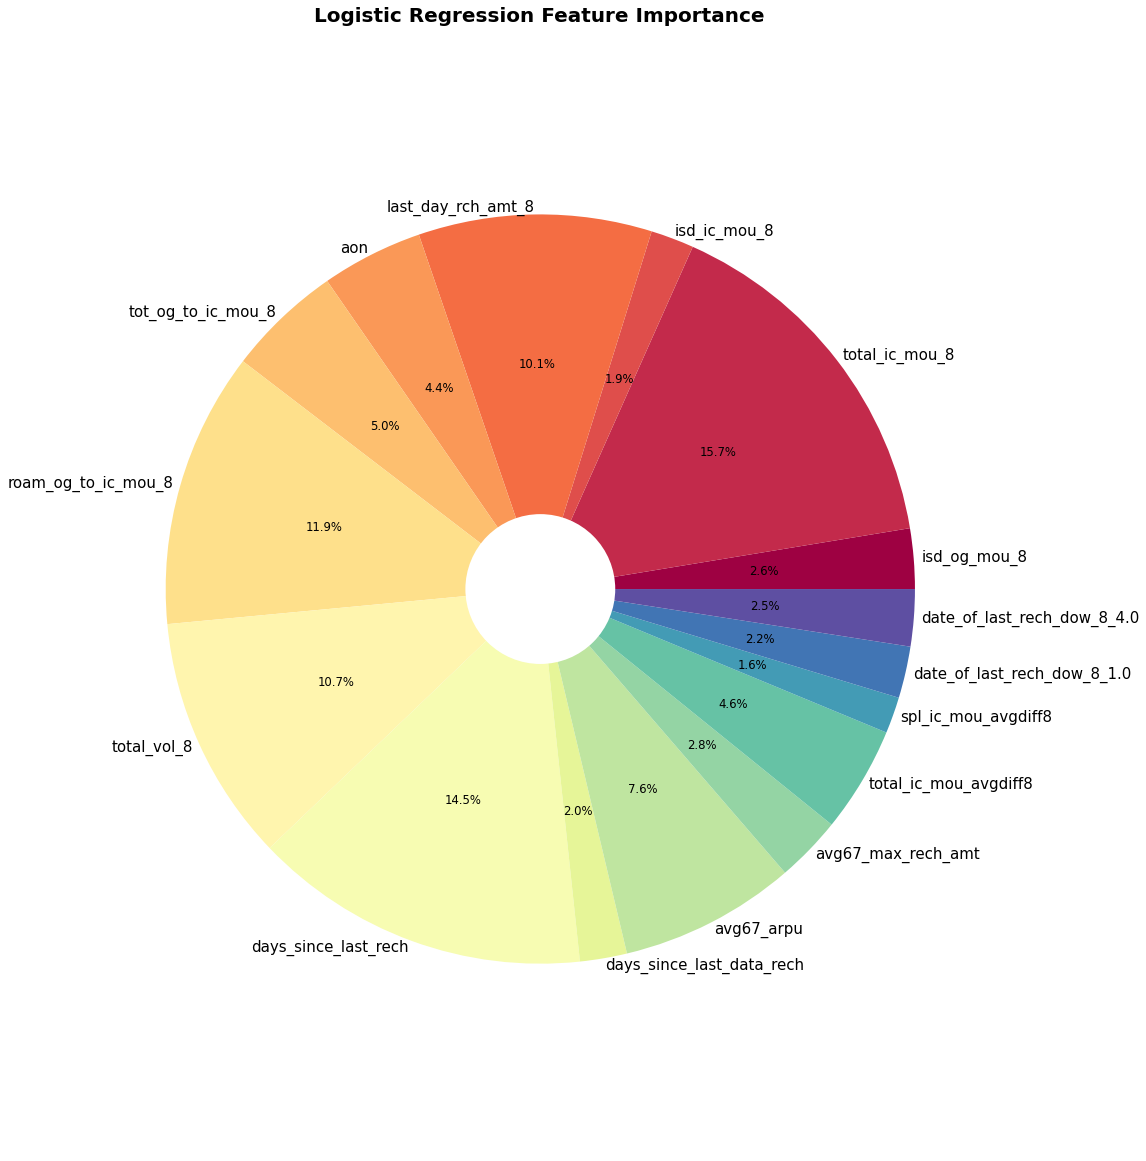

In [160]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 16)]
plt.figure(figsize=(16,16))
wedges, labels, autopct = plt.pie(feat_imp, labeldistance=1.02,labels=X_train.columns, autopct='%1.1f%%', shadow=False, colors=colors)
for lab in labels:
    lab.set_fontsize(15)
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
centre_circle = plt.Circle((0,0),0.20,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title('Logistic Regression Feature Importance',fontweight='bold',size=20)
plt.show()

`Top 10 features for Business should consider while predicting customers who are likely to churn and can make business decision on those. Below are the features importances in their decreasing order:`
- total_ic_mou_8 (total incoming minutes of usage for 8th month)
- days_since_last_rech (days since last recharge)
- roam_og_to_ic_mou_8(roaming outgoing to incoming ratio of minute of usage for 8th month)
- total_vol_8 (total volume of data usage (2g + 3g) for 8th month
- last_day_rch_amt_8 (last day recharge amount for 8th month)
- avg67_arpu( avergae revenure per user average for 6th and 7th month)
- tot_og_to_ic_mou_8 (total outgoing to incoming minutes of usage for 8th month)
- total_ic_mou_avgdiff8 (total incoming minutes of usage average 6th and 7th month difference from 8th month)
- aon (age on network)
- avg67_max_rech_amt(average of 6th and 7th month maximum recaherge amount)

`From logistic regression using 16 feature variables I got:`
- Recall Score= 87%
- Accuracy = 85%
- ROC AUC= 85%
- Specificity= 84%

# Random Forest Interpretable model 

In [161]:
y_train = df_train['churn']
X_train = df_train.drop('churn',axis=1)
y_test = df_test['churn']
X_test = df_test.drop('churn',axis=1)
# Scaling
scaler = StandardScaler()
colums = list(X_train.columns)
X_train[colums] = scaler.fit_transform(X_train[colums])
X_test[colums] = scaler.transform(X_test[colums])

In [162]:
rfc=RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=15,min_samples_leaf=50,\
                                          min_samples_split=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=15, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=80, random_state=42)

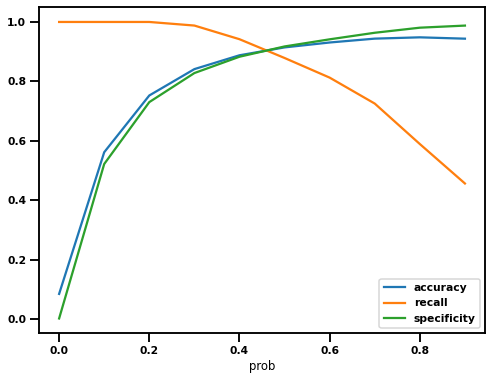

In [163]:
#optimal cutoff
df_cutoff=predictChurnlabeloncutoff(rfc,X_train,y_train)
optimal_cutoff(df_cutoff)


In [164]:
#As we can see cutoff=0.38 given good recall score as well as accuracy and specificity.
threshold=0.38 #from graph, at 0.38 we can have good score for recall(objective to maximize recall) with decent score for accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(rfc,X_test,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8300
           1       0.35      0.86      0.49       701

    accuracy                           0.86      9001
   macro avg       0.67      0.86      0.71      9001
weighted avg       0.94      0.86      0.89      9001

Confusion Matrix:

[[7161 1139]
 [  98  603]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.86,0.86,0.14,0.86,0.86,603,7161,1139,98


In [165]:
# Check the feature importance score for each feature
feat_imp_df = pd.DataFrame({'Feature':X_train.columns, 'Score':rfc.feature_importances_})
feat_imp_df = feat_imp_df.sort_values('Score', ascending=False).reset_index() # Order features by score
feat_imp_df.head(20)

,index,Feature,Score
0,17,total_og_mou_8,0.068309
1,26,total_ic_mou_8,0.065227
2,158,tot_amt_avgdiff8,0.047465
3,49,tot_og_to_ic_mou_8,0.041385
4,33,last_day_rch_amt_8,0.039887
5,48,tot_amt_8,0.039623
6,51,roam_og_to_ic_mou_8,0.037037
7,0,arpu_8,0.034316
8,112,arpu_avgdiff8,0.034058
9,57,days_since_last_rech,0.032032


In [166]:
m=list(feat_imp_df.Feature[:16])
n=list(feat_imp_df.Score[:16])

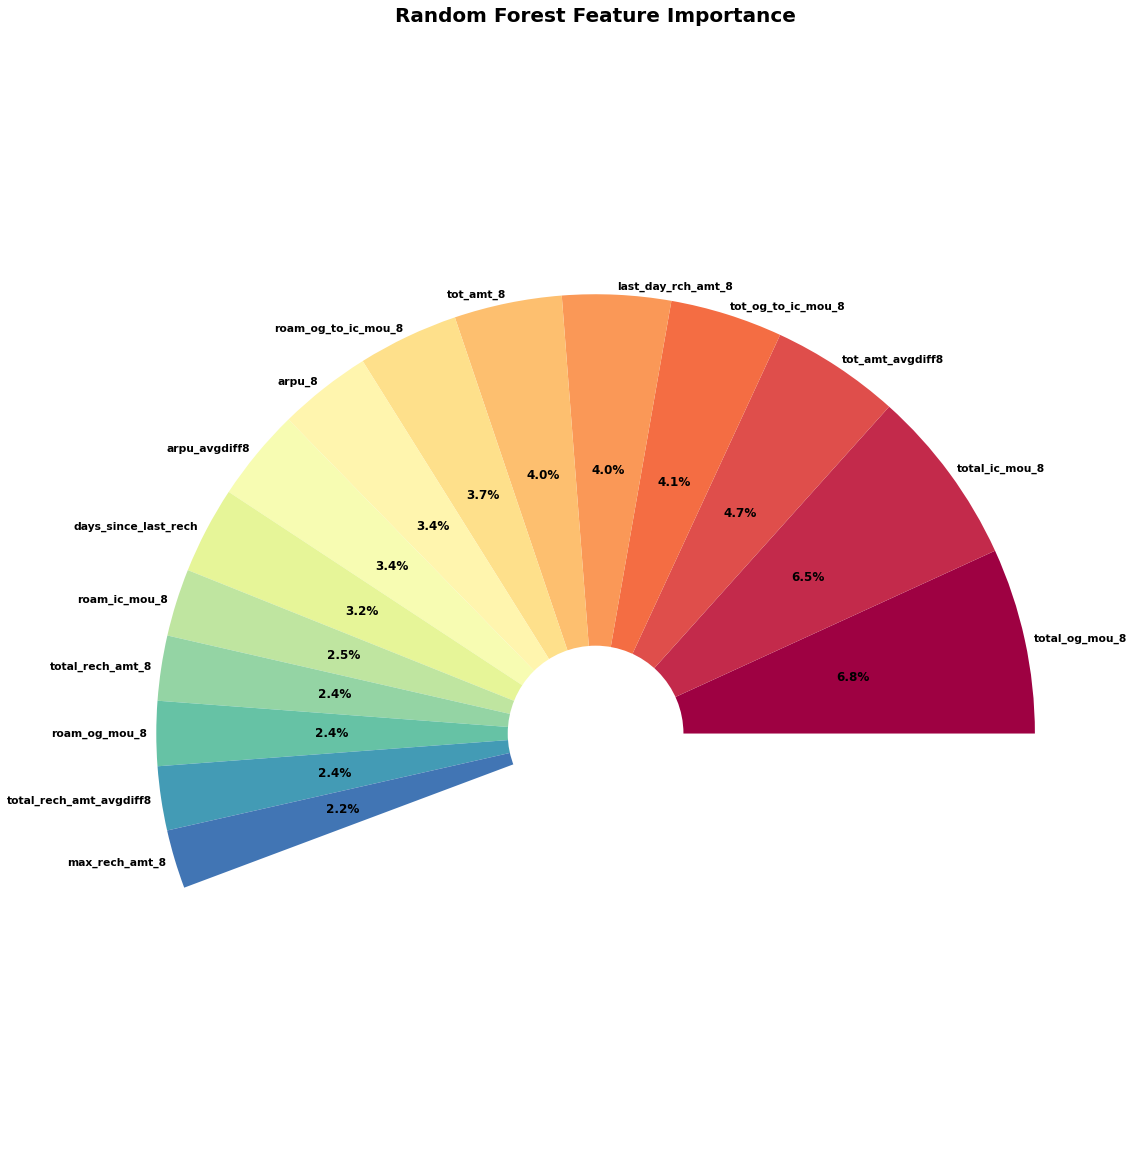

In [167]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 16)]
plt.figure(figsize=(16,16))
wedges1, labels1, autopct1 = plt.pie(list(feat_imp_df.Score[:15]), labeldistance=1.02,\
                                  labels=list(feat_imp_df.Feature[:15]), autopct='%1.1f%%', shadow=False, colors=colors)
for lab in labels:
    lab.set_fontsize(15)
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
centre_circle = plt.Circle((0,0),0.20,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title('Random Forest Feature Importance',fontweight='bold',size=20)
plt.show()

`Top 10 feature variables for business which will be very helpful in business making decision and give additional benefits/discount to customers who are likely to churn`
- total_og_mou_8 (Total outgoing minutes of usage for 8th month)
- total_ic_mou_8 (Total incoming minutes of usage for 8th month)
- tot_amt_avgdiff8 (Total amount 6th and 7th month average difference from 8th month)
- ot_og_to_ic_mou_8 (outgoing to incoming minutes of usage ratio for 8th month
- last_day_rch_amt_8 (last dat recharge amount for 8th month)
- tot_amt_8 (total amount for 8th month)
- roam_og_to_ic_mou_8 (roaming outgoing to incoming minutes of usage for 8th month)
- arpu_avgdiff8	( avergae revenure per user 6th and 7th month average from 8th month)
- arpu_8 ( avergae revenure per user for 8th month)
- days_since_last_rech (days since last recharge)

`From logistic regression using 16 feature variables I got:`
- Recall Score= 86%
- Accuracy = 86%
- ROC AUC= 86%
- Specificity= 86%

`As we can see both logistic regression and random forest classifier provides us similar predictor variables for making business decision to decrease or stop customer from churning who are likely to churn. Telcom company can introduce promotional offers to those customers who are likely to churn. Also, we have implemented all our models for high value customers. Now, Business people can make decision on those most important preidctor variables. Since, we have use different models for predicting these feature variable and difference techniques for feature selection we are getting similar predicting variable but order is slightly different. Hence we recommend  Telecom company to consider these feature variables which are strong indicators to manage customer churn.`

# Thank You :)